In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Queens Pop Data

In [ ]:
pop_df = pd.read_csv('QueensPopulationData.csv')
pop_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'QueensPopulationData.csv'

In [ ]:
pop_df.info()
#In this data set there are counts for many different demographics, household sizes, etc.
#Here are all the descriptions for the columns. Each one also has a P column next to it,
#which gives that population percentage of that area (for that demographic)
# NTAType	0=Residential, 9=Park, 8=Airport, 7=Cemetery, 6=Other Special Areas, 5=Rikers Island
# Pop		  Total population
# HHPop		Population in households
# GQ		  Population in group quarters
# InstGQ	Institutionalized population
# AvHHSz	Average household size
# PopU18	Total persons under 18 years
# Hsp		  Hispanic/Latino (of any race)
# WNH		  White, non-Hispanic
# BNH		  Black, non-Hispanic
# ANH		  Asian, non-Hispanic
# ONH		  Some other race, non-Hispanic
# NH2pl		Non-Hispanic of two or more races
# HUnits	Total housing units
# OcHU		Occupied housing units
# VacHU		Vacant housing units

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        82 non-null     object 
 1   GeoID       82 non-null     object 
 2   NTA Type    82 non-null     int64  
 3   Pop_20      82 non-null     object 
 4   Pop_20P     74 non-null     float64
 5   HHPop_20    82 non-null     object 
 6   HHPop_20P   73 non-null     float64
 7   GQ_20       82 non-null     object 
 8   GQ_20P      65 non-null     float64
 9   InstGQ_20   82 non-null     object 
 10  InstGQ_20P  39 non-null     float64
 11  AvHHSz_20   71 non-null     float64
 12  AvHHSz_20P  0 non-null      float64
 13  PopU18_20   82 non-null     object 
 14  PopU18_20P  69 non-null     float64
 15  Hsp_20      82 non-null     object 
 16  Hsp_20P     70 non-null     float64
 17  WNH_20      82 non-null     object 
 18  WNH_20P     67 non-null     float64
 19  BNH_20      82 non-null     obj

In [ ]:
pop_df = pop_df.drop(columns=['AvHHSz_20P']) #drop column because it is fully blank.
name_info = pop_df[['Name','GeoID']] #Don't need the name or geo ID for this EDA
# print(name_info.head())
pop_df = pop_df.drop(columns=['Name','GeoID'])
# pop_df.info()

In [ ]:
pop_df = pop_df.replace(',','', regex=True)
cols = pop_df.select_dtypes(object).columns
pop_df[cols] = pop_df[cols].apply(pd.to_numeric)
print(pop_df.head())
pop_df.info()

   NTA Type  Pop_20  Pop_20P  HHPop_20  HHPop_20P  GQ_20  GQ_20P  InstGQ_20  \
0         0   50225    100.0     49826       99.2    399     0.8          0   
1         0   18927    100.0     18652       98.5    275     1.5          0   
2         0   52220    100.0     51875       99.3    345     0.7        268   
3         0   38673    100.0     38582       99.8     91     0.2          0   
4         0   32954    100.0     31708       96.2   1246     3.8          0   

   InstGQ_20P  AvHHSz_20  ...  ONH_20  ONH_20P  NH2pl_20  NH2pl_20P  \
0         NaN       2.30  ...     636      1.3      1818        3.6   
1         NaN       2.38  ...     386      2.0       761        4.0   
2         0.5       2.03  ...     805      1.5      2273        4.4   
3         NaN       2.30  ...     712      1.8      1717        4.4   
4         NaN       2.27  ...     486      1.5      1260        3.8   

   HUnits_20  HUnits_20P  OcHU_20  OcHU_20P  VacHU_20  VacHU_20P  
0      22958       100.0    216

In [ ]:
# separating the percentage columns from the raw number columns
percent_cols = [col for col in pop_df.columns if '20P' in col]
count_cols = [col for col in pop_df.columns if '20P' not in col]
percent_cols = ['NTA Type'] + percent_cols #Adding this one in because both sets of columns can use it
percent_df = pop_df[percent_cols]
count_df = pop_df[count_cols]

#Now that these are in seperate dataframes, we can strip the suffixes.
#The _20 stands for the year 2020, but since only 1 year is in this data it can be removed
#There was also data on 2010, but that feels too old for this project.
count_df.columns = count_df.columns.str.rstrip('_20')
percent_df.columns = percent_df.columns.str.rstrip('_20P')
count_df.info()
# Each of the columns in the count_df are non-null except AvHHSz_20, which is the average household size.
# It is something to note that those are only in nonresidential areas like parks, cementaries, and airports.
# It can be reasonable to assume 0 for them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NTA Type  82 non-null     int64  
 1   Pop       82 non-null     int64  
 2   HHPop     82 non-null     int64  
 3   GQ        82 non-null     int64  
 4   InstGQ    82 non-null     int64  
 5   AvHHSz    71 non-null     float64
 6   PopU18    82 non-null     int64  
 7   Hsp       82 non-null     int64  
 8   WNH       82 non-null     int64  
 9   BNH       82 non-null     int64  
 10  ANH       82 non-null     int64  
 11  ONH       82 non-null     int64  
 12  NH2pl     82 non-null     int64  
 13  HUnits    82 non-null     int64  
 14  OcHU      82 non-null     int64  
 15  VacHU     82 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 10.4 KB


In [ ]:
percent_df.info()
#These have many more null values. However, all of them appear when the repsective count column is 0.
#The percent is then 0, it just wasn't bothered to be put into the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NTA Type  82 non-null     int64  
 1   Pop       74 non-null     float64
 2   HHPop     73 non-null     float64
 3   GQ        65 non-null     float64
 4   InstGQ    39 non-null     float64
 5   PopU18    69 non-null     float64
 6   Hsp       70 non-null     float64
 7   WNH       67 non-null     float64
 8   BNH       66 non-null     float64
 9   ANH       65 non-null     float64
 10  ONH       64 non-null     float64
 11  NH2pl     69 non-null     float64
 12  HUnits    74 non-null     float64
 13  OcHU      71 non-null     float64
 14  VacHU     67 non-null     float64
dtypes: float64(14), int64(1)
memory usage: 9.7 KB


In [ ]:
#Filling na values with 0
percent_df.fillna(0,inplace=True)
percent_df.head()

<ipython-input-8-84bd9a55214a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_df.fillna(0,inplace=True)


NTA Type    Pop  HHPop   GQ  InstGQ  PopU18   Hsp   WNH   BNH   ANH  ONH  \
0         0  100.0   99.2  0.8     0.0    15.0  19.8  62.8   2.4  10.1  1.3   
1         0  100.0   98.5  1.5     0.0    17.3  32.8  33.2  14.0  13.9  2.0   
2         0  100.0   99.3  0.7     0.5    10.4  22.8  52.3   1.8  17.2  1.5   
3         0  100.0   99.8  0.2     0.0    14.4  27.2  45.4   4.6  16.6  1.8   
4         0  100.0   96.2  3.8     0.0    16.5  31.1  23.2  19.8  20.6  1.5   

   NH2pl  HUnits  OcHU  VacHU  
0    3.6   100.0  94.2    5.8  
1    4.0   100.0  94.4    5.6  
2    4.4   100.0  95.5    4.5  
3    4.4   100.0  94.9    5.1  
4    3.8   100.0  93.7    6.3

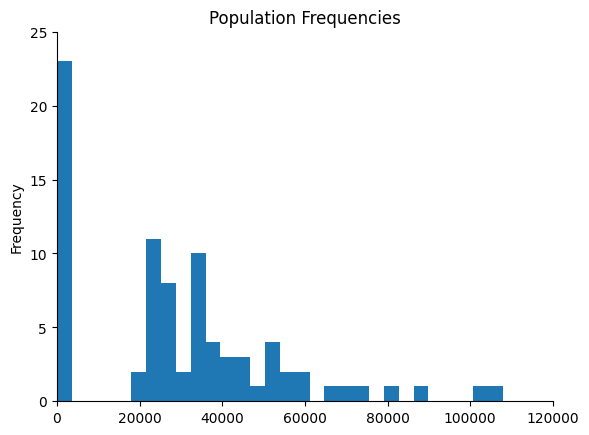

In [ ]:
# Pop_20 Histogram
count_df['Pop'].plot(kind='hist', bins=30, title='Population Frequencies', xlim=[0,120000], ylim=[0,25])
plt.gca().spines[['top', 'right',]].set_visible(False)

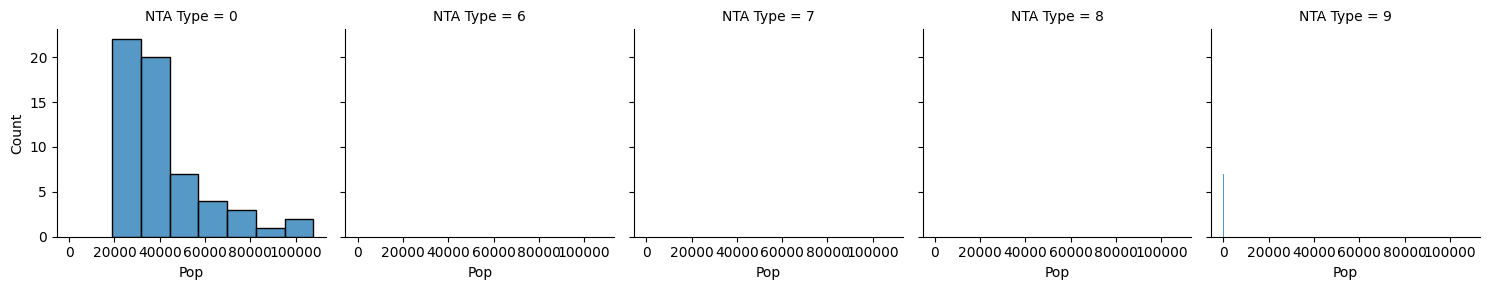

In [ ]:
g=sns.FacetGrid(count_df, col="NTA Type")
g.map_dataframe(sns.histplot, 'Pop')

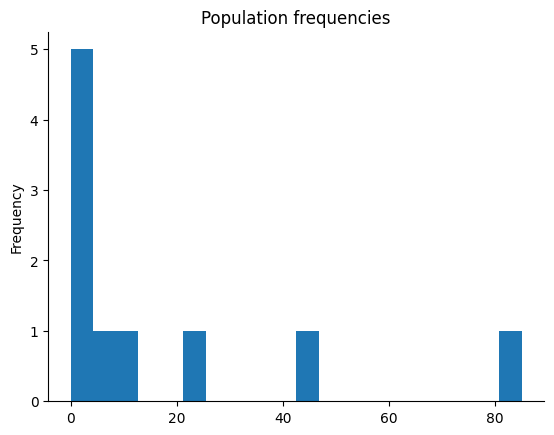

In [ ]:
# NTAType	0=Residential, 9=Park, 8=Airport, 7=Cemetery, 6=Other Special Areas, 5=Rikers Island
# to look further into the blank graphs, let's separate teh data and just look at one
residential = count_df[count_df['NTA Type'] == 0]
park = count_df[count_df['NTA Type'] == 9]
airport = count_df[count_df['NTA Type'] == 8]
cemetery = count_df[count_df['NTA Type'] == 7]
other = count_df[count_df['NTA Type'] == 6]
park['Pop'].plot(kind='hist', bins=20, title='Population frequencies')
plt.gca().spines[['top', 'right',]].set_visible(False)

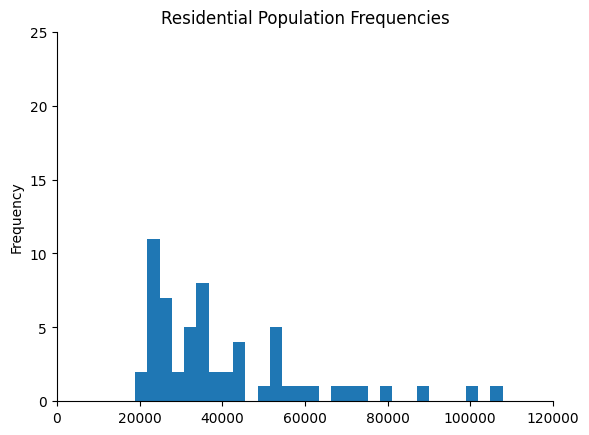

In [ ]:
#When just looking at residential, it covers all population counts not near zero. The other zones make sense having a small population count.
residential['Pop'].plot(kind='hist', bins=30, title='Residential Population Frequencies', xlim=[0,120000], ylim=[0,25])
plt.gca().spines[['top', 'right',]].set_visible(False)

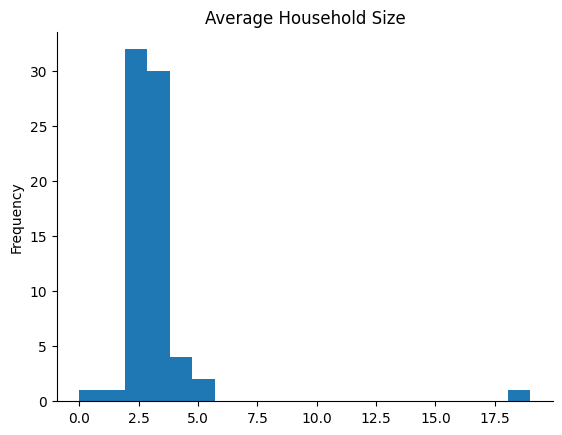

In [ ]:
count_df['AvHHSz'].plot(kind='hist', bins=20, title='Average Household Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

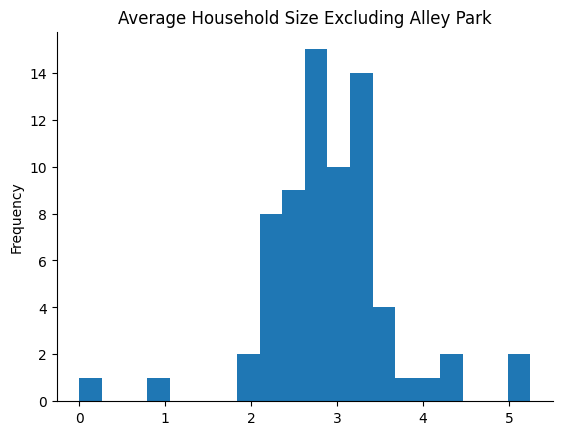

In [ ]:
no_alleypond = count_df[count_df['AvHHSz'] < 10]
no_alleypond['AvHHSz'].plot(kind='hist', bins=20, title='Average Household Size Excluding Alley Park')
plt.gca().spines[['top', 'right',]].set_visible(False)

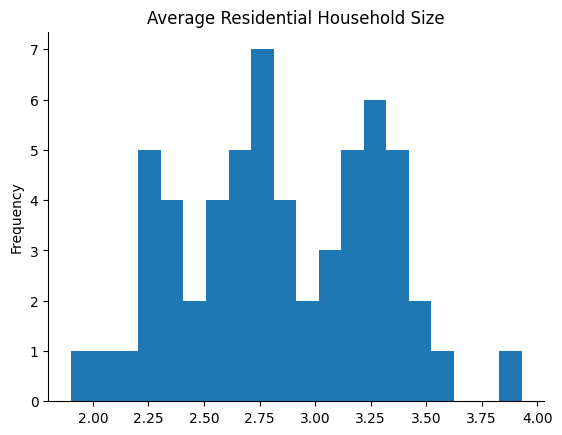

In [ ]:
residential['AvHHSz'].plot(kind='hist', bins=20, title='Average Residential Household Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

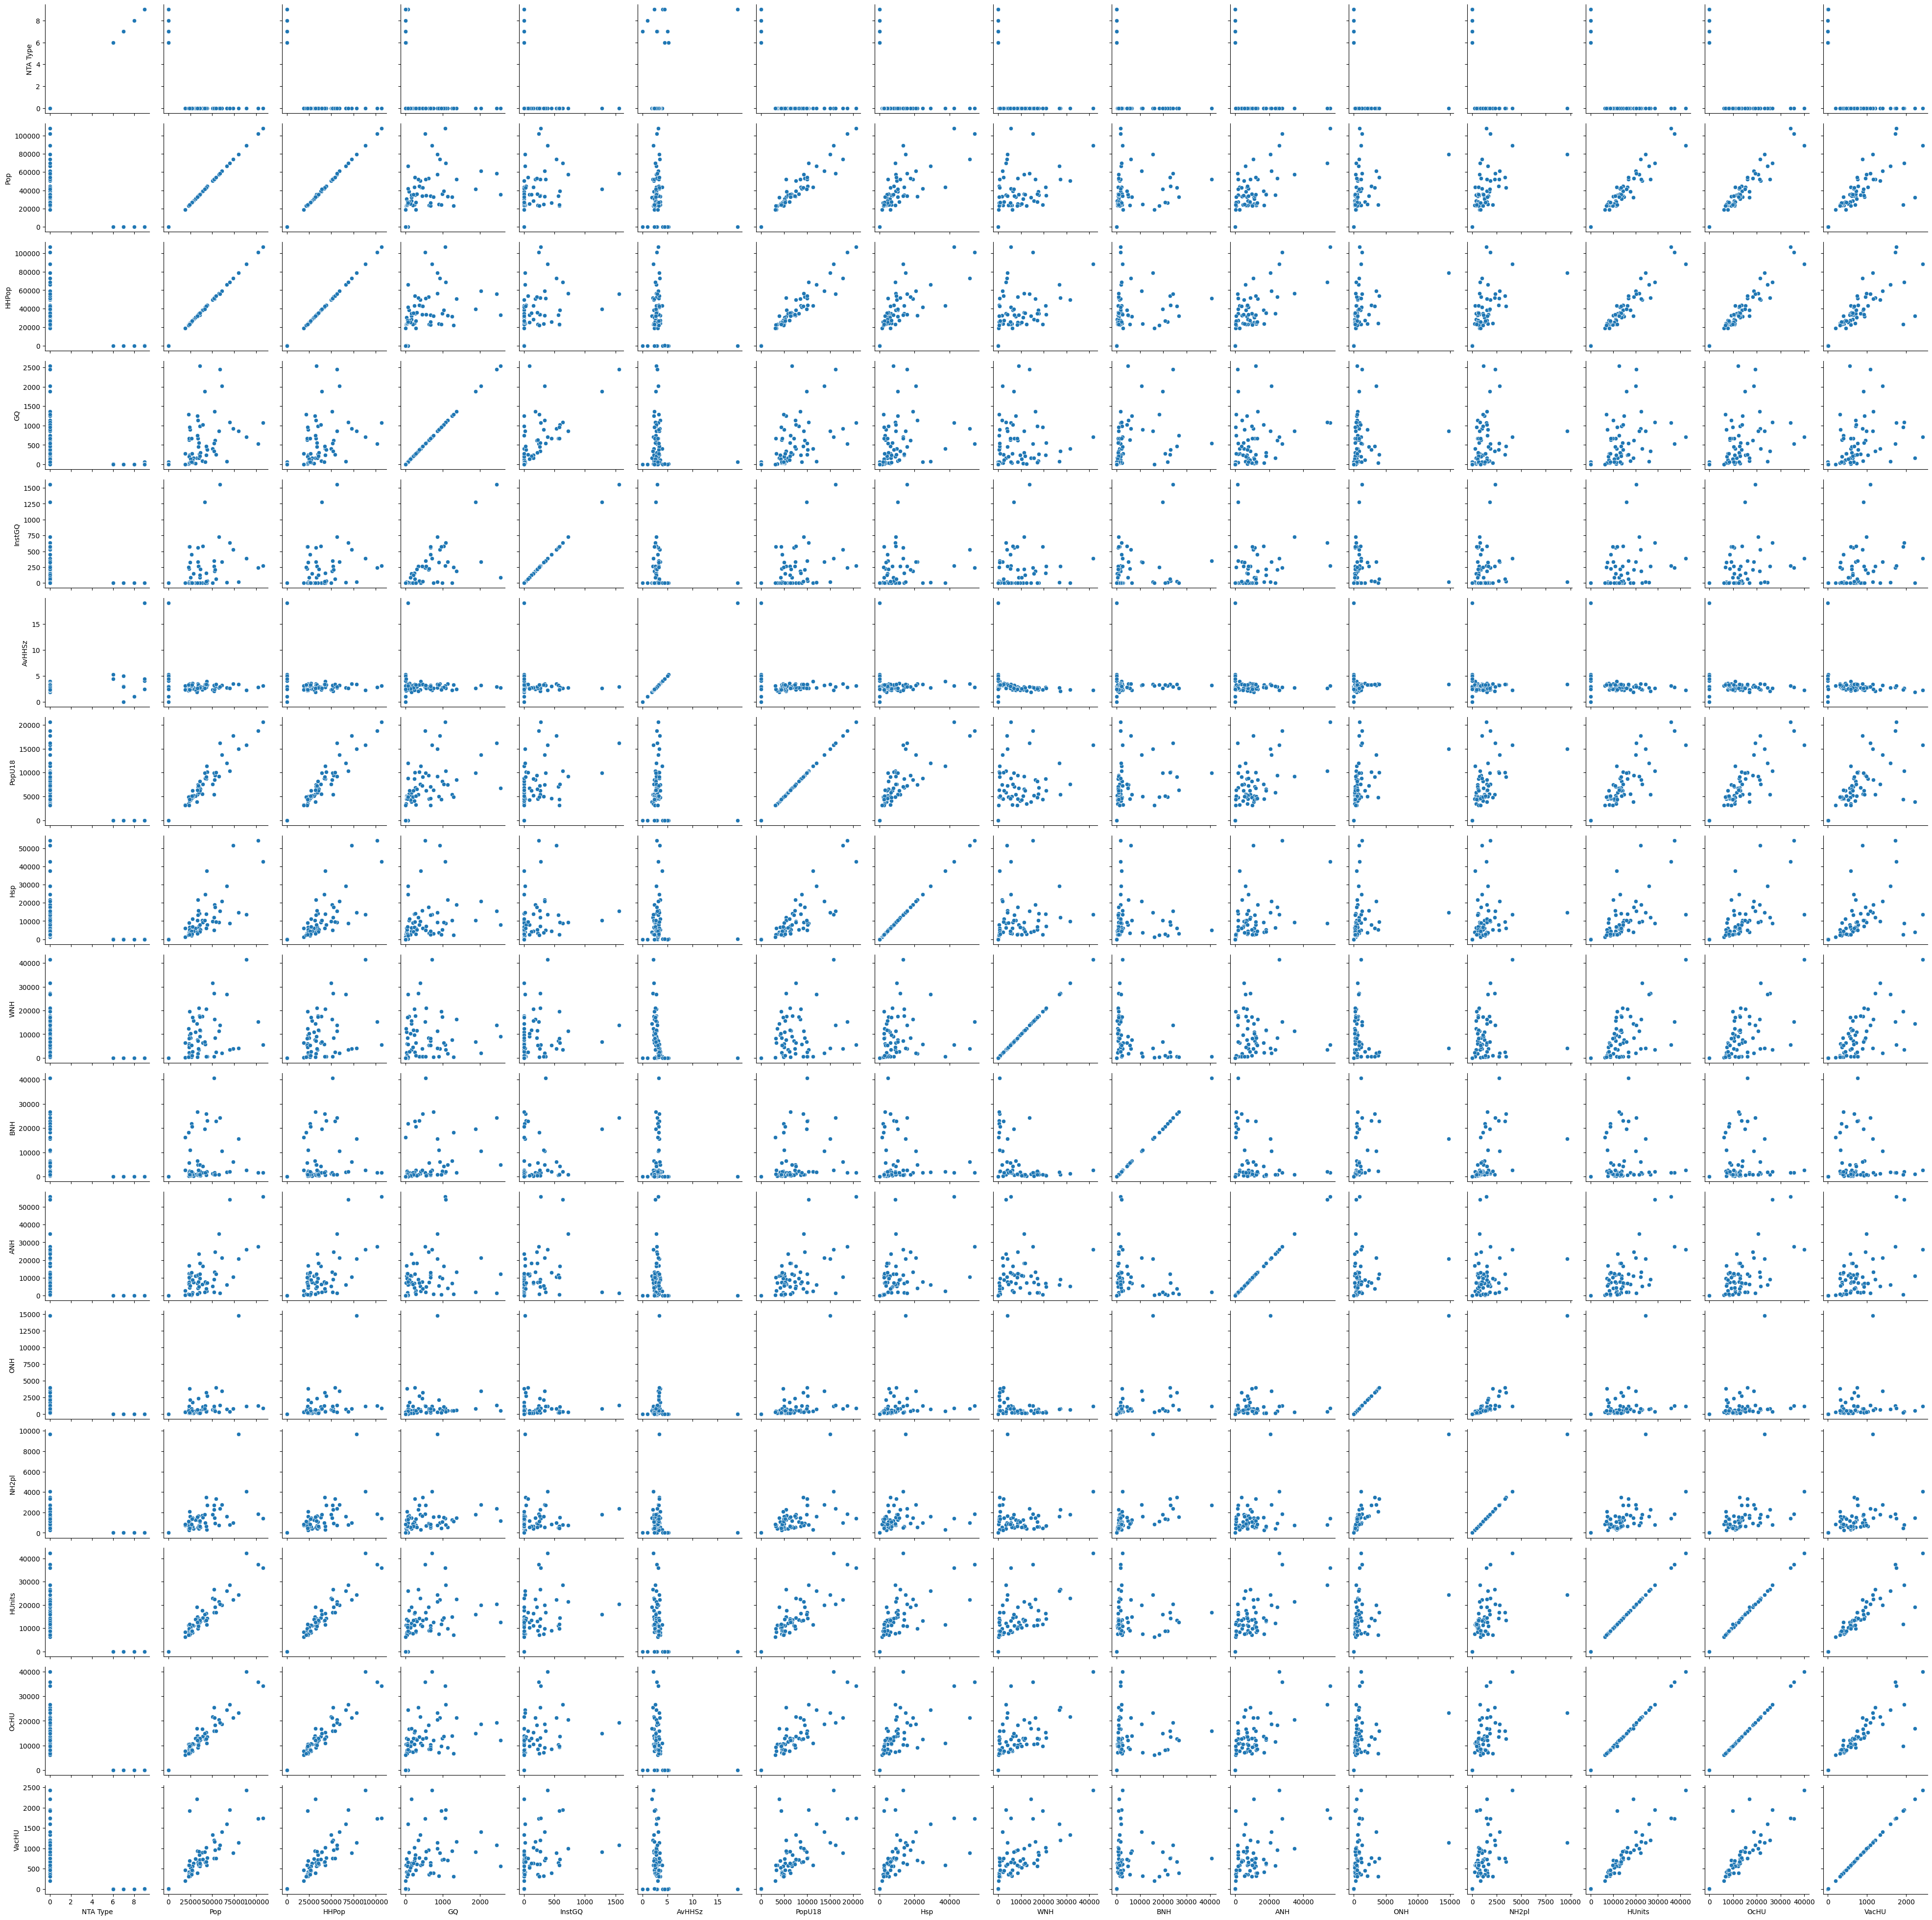

In [ ]:
g = sns.PairGrid(count_df)
g.map(sns.scatterplot)

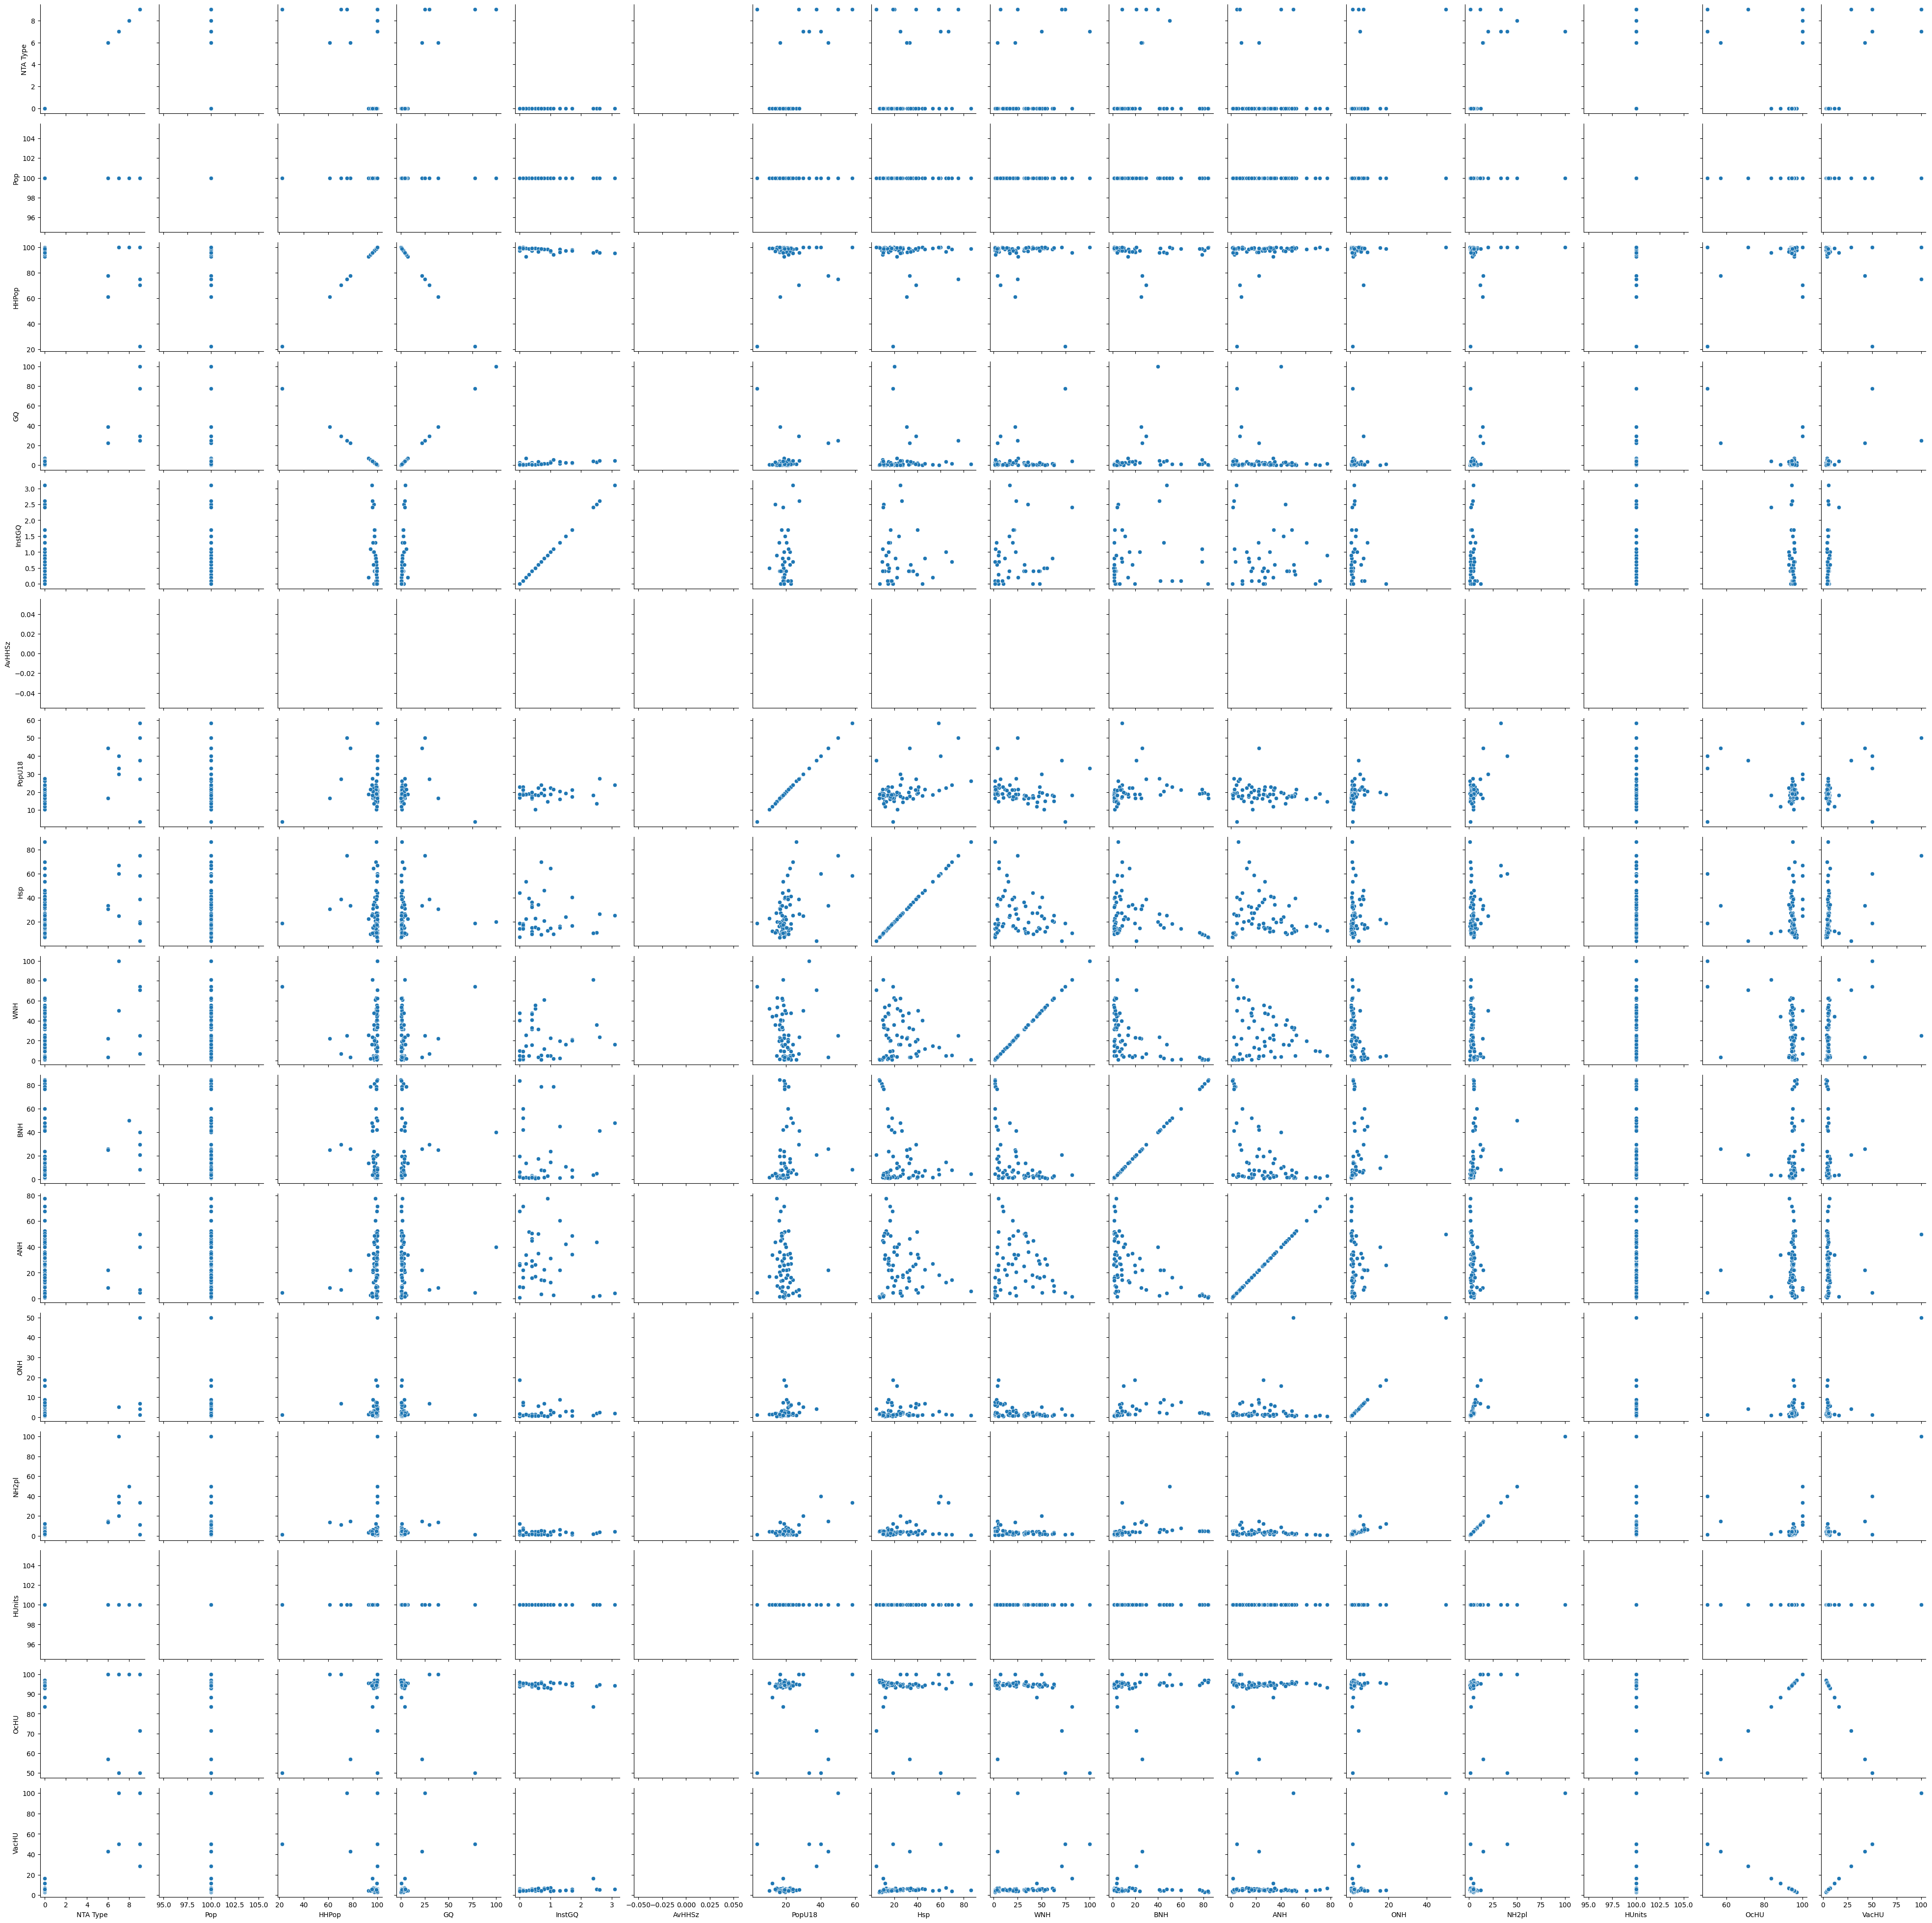

In [ ]:
g2 = sns.PairGrid(percent_df)
g2.map(sns.scatterplot)

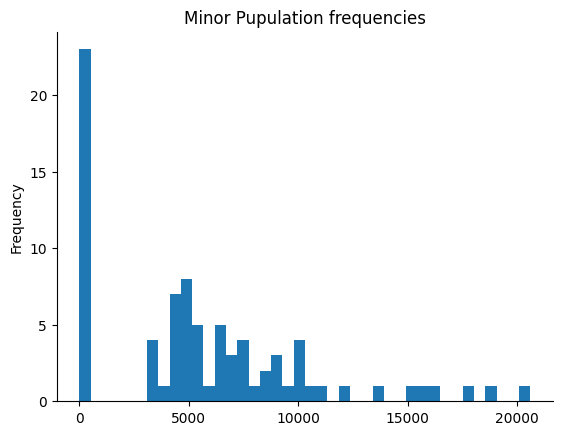

In [ ]:
count_df['PopU18'].plot(kind='hist', bins=40, title='Minor Pupulation frequencies')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Food Access Research Data**

In [ ]:
food_df = pd.read_csv('FoodAccessResearchAtlasData2019csv.csv')
food_df.describe()

CensusTract         Urban       Pop2010       OHU2010  \
count  7.253100e+04  72531.000000  72531.000000  72531.000000   
mean   2.782573e+10      0.760626   4256.739022   1609.191821   
std    1.581647e+10      0.426704   1955.987626    725.676046   
min    1.001020e+09      0.000000      1.000000      0.000000   
25%    1.212708e+10      1.000000   2899.000000   1108.000000   
50%    2.712979e+10      1.000000   4011.000000   1525.000000   
75%    4.103900e+10      1.000000   5330.500000   2021.000000   
max    5.604595e+10      1.000000  37452.000000  16043.000000   

       GroupQuartersFlag      NUMGQTRS      PCTGQTRS  LILATracts_1And10  \
count       72531.000000  72506.000000  72506.000000       72531.000000   
mean            0.007114    110.121549      2.708677           0.128125   
std             0.084046    443.931753      9.570875           0.334231   
min             0.000000      0.000000      0.000000           0.000000   
25%             0.000000      0.000000      0.000000           0.000000   
50%             0.000000      7.000000      0.180000           0.000000   
75%             0.000000     64.000000      1.570000           0.000000   
max             1.000000  19496.000000    100.000000           1.000000   

       LILATracts_halfAnd10  LILATracts_1And20  ...  TractSeniors  \
count          72531.000000       72531.000000  ...  72527.000000   
mean               0.279150           0.112228  ...    555.197113   
std                0.448584           0.315649  ...    351.805391   
min                0.000000           0.000000  ...      0.000000   
25%                0.000000           0.000000  ...    320.000000   
50%                0.000000           0.000000  ...    497.000000   
75%                1.000000           0.000000  ...    718.000000   
max                1.000000           1.000000  ...  17271.000000   

         TractWhite    TractBlack    TractAsian    TractNHOPI     TractAIAN  \
count  72527.000000  72527.000000  72527.000000  72527.000000  72527.000000   
mean    3082.337157    536.756160    202.327685      7.445655     40.152316   
std     1796.364560    889.118109    435.878339     45.186581    177.378696   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     1848.000000     43.000000     17.000000      0.000000      7.000000   
50%     2914.000000    160.000000     58.000000      1.000000     15.000000   
75%     4118.000000    610.000000    189.000000      5.000000     33.000000   
max    28983.000000  16804.000000  10485.000000   3491.000000   9009.000000   

       TractOMultir  TractHispanic     TractHUNV     TractSNAP  
count  72527.000000   72527.000000  72527.000000  72527.000000  
mean     387.664649     695.979277    143.709736    201.753182  
std      529.349680    1119.472739    232.738869    185.760089  
min        0.000000       0.000000      0.000000      0.000000  
25%       85.000000      88.000000     36.000000     67.000000  
50%      186.000000     243.000000     82.000000    152.000000  
75%      448.000000     751.000000    168.500000    282.000000  
max     8839.000000   15420.000000   6059.000000   2175.000000  

[8 rows x 145 columns]

In [ ]:
# Clean up the data

#dropping all states except new york
food_df = food_df.drop(food_df[food_df['State'] != 'New York'].index)

#selecting only Queens
queens_df = food_df[food_df['County'] == 'Queens County']

#resetting index
queens_df=queens_df.reset_index()

queens_df

index  CensusTract     State         County  Urban  Pop2010  OHU2010  \
0    45973  36081000100  New York  Queens County      1     4949     2626   
1    45974  36081000200  New York  Queens County      1     2829      876   
2    45975  36081000400  New York  Queens County      1     4413     1226   
3    45976  36081000600  New York  Queens County      1     3729     1074   
4    45977  36081000700  New York  Queens County      1     4790     2379   
..     ...          ...       ...            ...    ...      ...      ...   
651  46624  36081157901  New York  Queens County      1     4800     1733   
652  46625  36081157902  New York  Queens County      1     3836     1107   
653  46626  36081157903  New York  Queens County      1     3944     1330   
654  46627  36081161700  New York  Queens County      1     4297     1468   
655  46628  36081162100  New York  Queens County      1     6197     1966   

     GroupQuartersFlag  NUMGQTRS  PCTGQTRS  ...  TractSeniors  TractWhite  \
0                    0     252.0      5.09  ...         268.0      3144.0   
1                    0       0.0      0.00  ...         269.0      1179.0   
2                    0       0.0      0.00  ...         297.0      1501.0   
3                    0       7.0      0.19  ...         265.0      1427.0   
4                    0       0.0      0.00  ...         382.0      3097.0   
..                 ...       ...       ...  ...           ...         ...   
651                  0       0.0      0.00  ...         948.0      2249.0   
652                  0      68.0      1.77  ...         706.0      1420.0   
653                  0       0.0      0.00  ...         675.0      1903.0   
654                  0      14.0      0.33  ...         597.0      2578.0   
655                  0       6.0      0.10  ...         579.0      2190.0   

     TractBlack  TractAsian  TractNHOPI  TractAIAN  TractOMultir  \
0         367.0      1073.0         5.0        7.0         353.0   
1         209.0       573.0         3.0       43.0         822.0   
2         443.0       618.0         9.0       61.0        1781.0   
3         479.0       432.0         2.0       36.0        1353.0   
4         145.0       798.0        12.0       35.0         703.0   
..          ...         ...         ...        ...           ...   
651        86.0      2101.0         3.0       21.0         340.0   
652       125.0      1975.0         0.0       16.0         300.0   
653       107.0      1571.0         3.0       31.0         329.0   
654       218.0       983.0         0.0        8.0         510.0   
655       505.0      2429.0         7.0       28.0        1038.0   

     TractHispanic  TractHUNV  TractSNAP  
0            485.0     2672.0       78.0  
1           1537.0      262.0      104.0  
2           2895.0      499.0      374.0  
3           2302.0      243.0      180.0  
4           1167.0     1712.0       47.0  
..             ...        ...        ...  
651          319.0      188.0      113.0  
652          353.0       80.0       59.0  
653          403.0      116.0       89.0  
654          816.0       49.0       40.0  
655         1365.0      211.0      211.0  

[656 rows x 148 columns]

## Previous Graphs

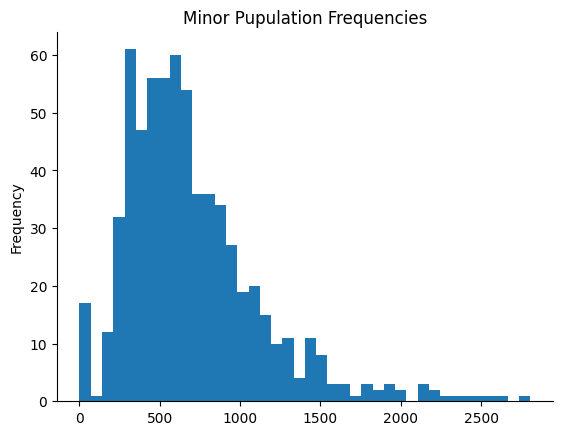

In [ ]:
queens_df['TractKids'].plot(kind='hist', bins=40, title='Minor Pupulation Frequencies')
plt.gca().spines[['top', 'right',]].set_visible(False)
#This data compared to the previous queens population data is much more granular, as well as having a more consistent size of population between each of the tracts.

array([[<Axes: title={'center': 'TractLOWI'}>,
        <Axes: title={'center': 'TractKids'}>,
        <Axes: title={'center': 'TractSeniors'}>],
       [<Axes: title={'center': 'TractWhite'}>,
        <Axes: title={'center': 'TractBlack'}>,
        <Axes: title={'center': 'TractAsian'}>],
       [<Axes: title={'center': 'TractHispanic'}>,
        <Axes: title={'center': 'TractHUNV'}>,
        <Axes: title={'center': 'TractSNAP'}>],
       [<Axes: title={'center': 'PovertyRate'}>,
        <Axes: title={'center': 'MedianFamilyIncome'}>, <Axes: >]],
      dtype=object)

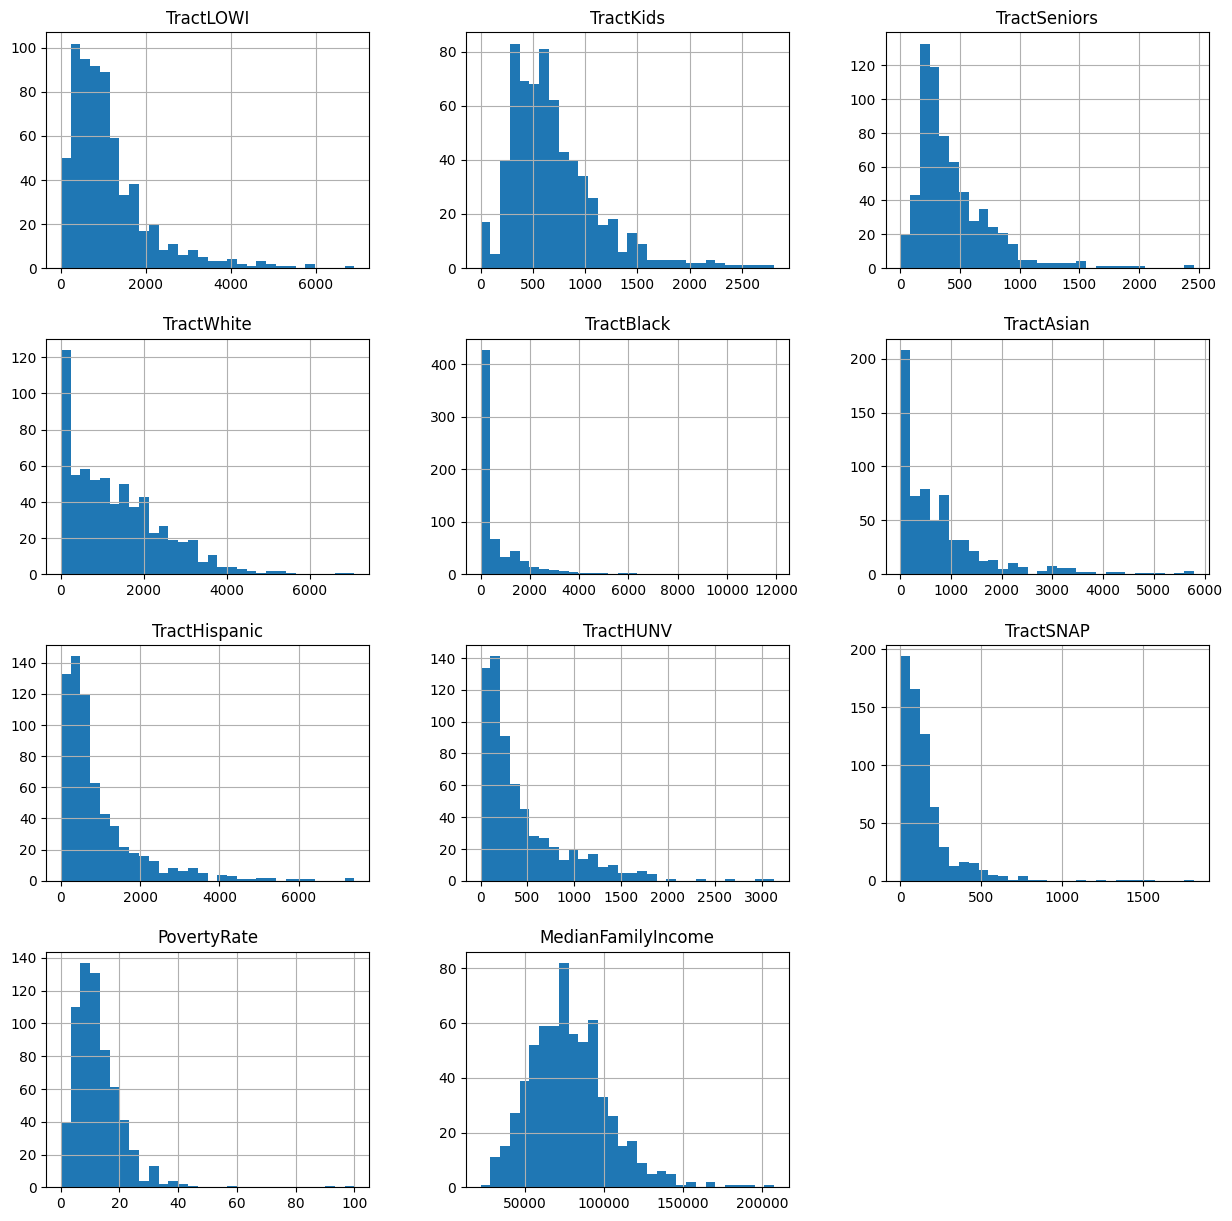

In [ ]:
selected_cols=['State','County','TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractHispanic', 'TractHUNV', 'TractSNAP', 'PovertyRate', 'MedianFamilyIncome']

key_indicators1=queens_df[selected_cols]

key_indicators1.hist(bins=30, figsize=(15, 15))

array([[<Axes: title={'center': 'TractLOWI'}>,
        <Axes: title={'center': 'TractKids'}>,
        <Axes: title={'center': 'TractSeniors'}>],
       [<Axes: title={'center': 'TractWhite'}>,
        <Axes: title={'center': 'TractBlack'}>,
        <Axes: title={'center': 'TractAsian'}>],
       [<Axes: title={'center': 'TractHispanic'}>,
        <Axes: title={'center': 'TractHUNV'}>,
        <Axes: title={'center': 'TractSNAP'}>],
       [<Axes: title={'center': 'PovertyRate'}>,
        <Axes: title={'center': 'MedianFamilyIncome'}>, <Axes: >]],
      dtype=object)

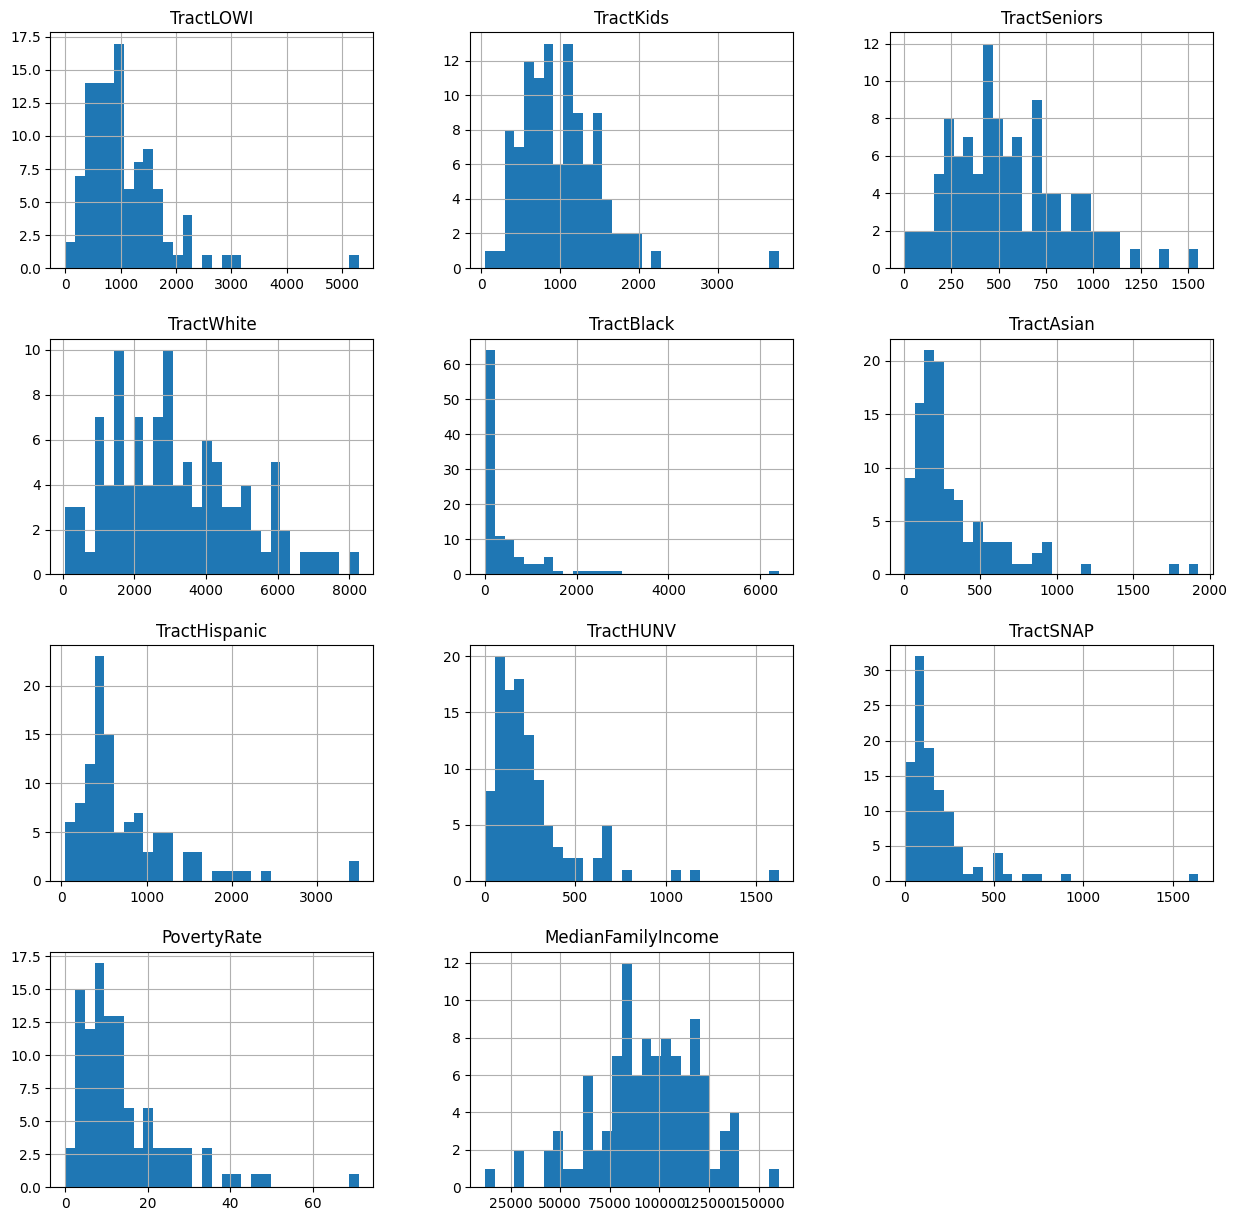

In [ ]:
food_df = food_df.drop(food_df[food_df['State'] != 'New York'].index)
# food_df.County.unique()
#selecting only Staten Island
staten_df = food_df[food_df['County'] == 'Richmond County']

#resetting index
staten_df=staten_df.reset_index()
key_indicators_staten=staten_df[selected_cols]

key_indicators_staten.hist(bins=30, figsize=(15, 15))

array([[<Axes: title={'center': 'TractLOWI'}>,
        <Axes: title={'center': 'TractKids'}>,
        <Axes: title={'center': 'TractSeniors'}>],
       [<Axes: title={'center': 'TractWhite'}>,
        <Axes: title={'center': 'TractBlack'}>,
        <Axes: title={'center': 'TractAsian'}>],
       [<Axes: title={'center': 'TractHispanic'}>,
        <Axes: title={'center': 'TractHUNV'}>,
        <Axes: title={'center': 'TractSNAP'}>],
       [<Axes: title={'center': 'PovertyRate'}>,
        <Axes: title={'center': 'MedianFamilyIncome'}>, <Axes: >]],
      dtype=object)

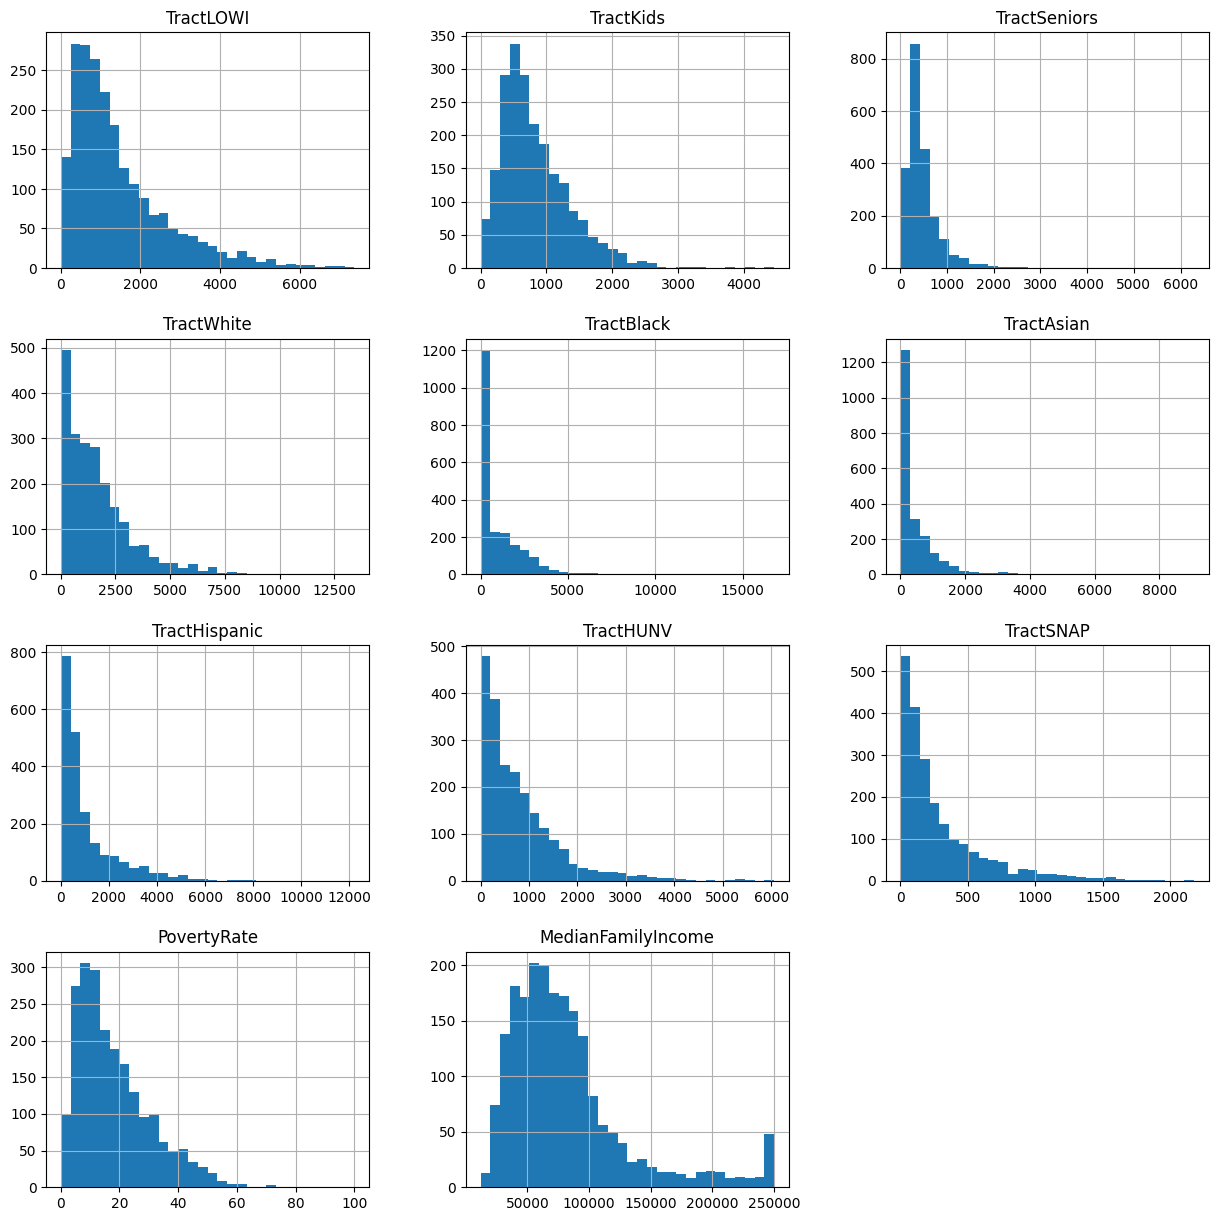

In [ ]:
# food_df.County.unique()
new_york_counties = food_df[food_df['County'].isin(['Queens County','Kings County', 'Bronx County', 'Richmond County', 'New York County'])]
# For reference: Brooklyn is Kings County, Staten Island is Richmond County, and Manhattan is New York County
selected_cols=['State','County','TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractHispanic', 'TractHUNV', 'TractSNAP', 'PovertyRate', 'MedianFamilyIncome']

key_indicators_new_york=new_york_counties[selected_cols]

key_indicators_new_york.hist(bins=30, figsize=(15, 15))

## Current Plots

In [ ]:
new_york_counties = food_df[food_df['County'].isin(['Queens County','Kings County', 'Bronx County', 'Richmond County', 'New York County'])]
# For reference: Brooklyn is Kings County, Staten Island is Richmond County, and Manhattan is New York County
new_york_counties.County.replace('Queens County', 'Queens', inplace=True)
new_york_counties.County.replace('Kings County', 'Brooklyn', inplace=True)
new_york_counties.County.replace('Bronx County', 'Bronx', inplace=True)
new_york_counties.County.replace('Richmond County', 'Staten Island', inplace=True)
new_york_counties.County.replace('New York County', 'Manhattan', inplace=True)


selected_cols=['State','County',
               'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractHispanic', 'TractHUNV', 'TractSNAP',
               'PovertyRate', 'MedianFamilyIncome']
for tract in selected_cols:
  if 'Tract' in tract:
    new_col_name = tract[5:]+"PopShare"
    new_york_counties[new_col_name] = new_york_counties[tract]/new_york_counties['Pop2010']

<ipython-input-4-e9794402ed30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_counties.County.replace('Queens County', 'Queens', inplace=True)
<ipython-input-4-e9794402ed30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_counties.County.replace('Kings County', 'Brooklyn', inplace=True)
<ipython-input-4-e9794402ed30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_counties.County.replace('Bronx County', '

In [ ]:
new_york_counties

CensusTract     State         County  Urban  Pop2010  OHU2010  \
42957  36005000100  New York          Bronx      1    11091        0   
42958  36005000200  New York          Bronx      1     4334     1351   
42959  36005000400  New York          Bronx      1     5503     1786   
42960  36005001600  New York          Bronx      1     5643     1925   
42961  36005001900  New York          Bronx      1     1917      550   
...            ...       ...            ...    ...      ...      ...   
46774  36085030301  New York  Staten Island      1     4929     1749   
46775  36085030302  New York  Staten Island      1     6369     1939   
46776  36085031901  New York  Staten Island      1     3265     1061   
46777  36085031902  New York  Staten Island      1     4848     1581   
46778  36085032300  New York  Staten Island      1     1250      448   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
42957                  1   11091.0    100.00                  0  ...   
42958                  0       5.0      0.12                  0  ...   
42959                  0      12.0      0.22                  0  ...   
42960                  0     242.0      4.29                  0  ...   
42961                  0     500.0     26.08                  0  ...   
...                  ...       ...       ...                ...  ...   
46774                  0       6.0      0.12                  0  ...   
46775                  0       0.0      0.00                  0  ...   
46776                  0       0.0      0.00                  0  ...   
46777                  0      16.0      0.33                  0  ...   
46778                  0       1.0      0.08                  0  ...   

       TractSNAP  LOWIPopShare  KidsPopShare  SeniorsPopShare  WhitePopShare  \
42957        0.0      0.000000      0.033090         0.004869       0.155441   
42958      275.0      0.426165      0.276880         0.105907       0.307337   
42959      265.0      0.234236      0.278030         0.076504       0.272033   
42960      649.0      0.529860      0.269715         0.143895       0.275740   
42961      261.0      0.727700      0.251956         0.048513       0.308294   
...          ...           ...           ...              ...            ...   
46774       87.0      0.220329      0.233110         0.094745       0.597079   
46775      260.0      0.227194      0.272256         0.066101       0.459413   
46776      707.0      0.480858      0.325268         0.057580       0.181623   
46777      538.0      0.466584      0.333952         0.050124       0.205652   
46778       58.0      0.240800      0.242400         0.082400       0.388000   

       BlackPopShare  AsianPopShare  HispanicPopShare  HUNVPopShare  \
42957       0.587413       0.016229          0.340727      0.000000   
42958       0.291647       0.032303          0.690586      0.062067   
42959       0.315283       0.022533          0.682355      0.078503   
42960       0.406344       0.011164          0.617048      0.176856   
42961       0.334377       0.013041          0.618675      0.311946   
...              ...            ...               ...           ...   
46774       0.148712       0.131467          0.246500      0.033881   
46775       0.220443       0.135657          0.339614      0.023866   
46776       0.596631       0.036447          0.334456      0.214701   
46777       0.601898       0.020833          0.308993      0.136757   
46778       0.406400       0.033600          0.353600      0.056800   

       SNAPPopShare  
42957      0.000000  
42958      0.063452  
42959      0.048156  
42960      0.115010  
42961      0.136150  
...             ...  
46774      0.017651  
46775      0.040823  
46776      0.216539  
46777      0.110974  
46778      0.046400  

[2140 rows x 156 columns]

In [ ]:
new_york_counties.describe()

CensusTract        Urban       Pop2010       OHU2010  \
count  2.140000e+03  2140.000000   2140.000000   2140.000000   
mean   3.605466e+10     0.999065   3820.155607   1453.170093   
std    2.594266e+07     0.030564   2148.908807   1009.089636   
min    3.600500e+10     0.000000      1.000000      0.000000   
25%    3.604703e+10     1.000000   2303.000000    789.000000   
50%    3.604712e+10     1.000000   3455.000000   1247.000000   
75%    3.608103e+10     1.000000   4849.250000   1798.500000   
max    3.608503e+10     1.000000  26588.000000  12426.000000   

       GroupQuartersFlag      NUMGQTRS     PCTGQTRS  LILATracts_1And10  \
count        2140.000000   2140.000000  2140.000000             2140.0   
mean            0.006075     86.696262     2.623734                0.0   
std             0.077722    331.676741     9.319624                0.0   
min             0.000000      0.000000     0.000000                0.0   
25%             0.000000      0.000000     0.000000                0.0   
50%             0.000000      6.000000     0.150000                0.0   
75%             0.000000     37.250000     1.092500                0.0   
max             1.000000  11091.000000   100.000000                0.0   

       LILATracts_halfAnd10  LILATracts_1And20  ...    TractSNAP  \
count           2140.000000             2140.0  ...  2140.000000   
mean               0.014953                0.0  ...   291.885981   
std                0.121394                0.0  ...   325.986709   
min                0.000000                0.0  ...     0.000000   
25%                0.000000                0.0  ...    72.750000   
50%                0.000000                0.0  ...   169.000000   
75%                0.000000                0.0  ...   392.000000   
max                1.000000                0.0  ...  2175.000000   

       LOWIPopShare  KidsPopShare  SeniorsPopShare  WhitePopShare  \
count   2140.000000   2140.000000      2140.000000    2140.000000   
mean       0.369459      0.216345         0.122311       0.436158   
std        0.251704      0.072293         0.063609       0.294040   
min        0.000000      0.000000         0.000000       0.000000   
25%        0.217290      0.175104         0.083136       0.179855   
50%        0.339638      0.218292         0.111039       0.399161   
75%        0.492041      0.260266         0.148655       0.708675   
max        6.128205      0.600975         1.000000       1.000000   

       BlackPopShare  AsianPopShare  HispanicPopShare  HUNVPopShare  \
count    2140.000000    2140.000000       2140.000000   2140.000000   
mean        0.271574       0.125610          0.266551      0.201367   
std         0.309597       0.154988          0.224597      0.314286   
min         0.000000       0.000000          0.000000      0.000000   
25%         0.021269       0.020392          0.092038      0.088506   
50%         0.109709       0.061669          0.176762      0.176009   
75%         0.482429       0.167415          0.392058      0.269729   
max         1.000000       1.000000          1.000000     10.750000   

       SNAPPopShare  
count   2140.000000  
mean       0.072648  
std        0.078020  
min        0.000000  
25%        0.026974  
50%        0.053170  
75%        0.099569  
max        1.871795  

[8 rows x 154 columns]

TractLOWI 7376.0 591.0 1957.25 8788.5


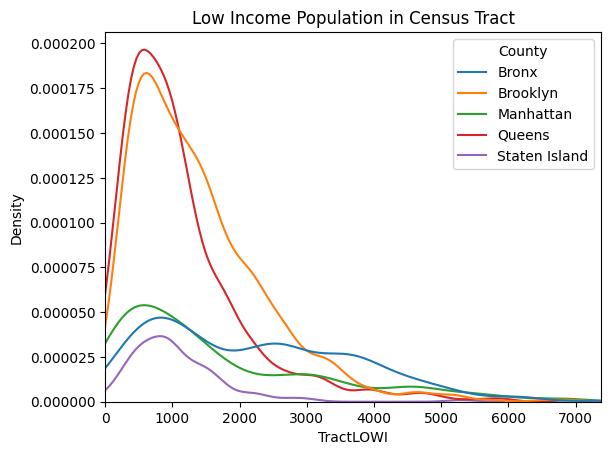

TractKids 4453.0 457.5 1090.75 4257.0


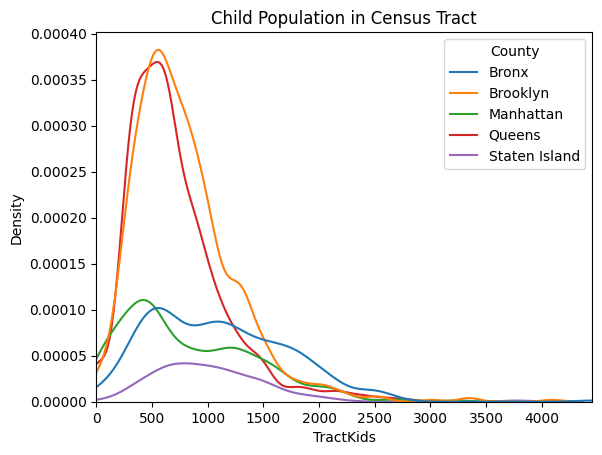

TractSeniors 6287.0 240.75 564.25 2181.75


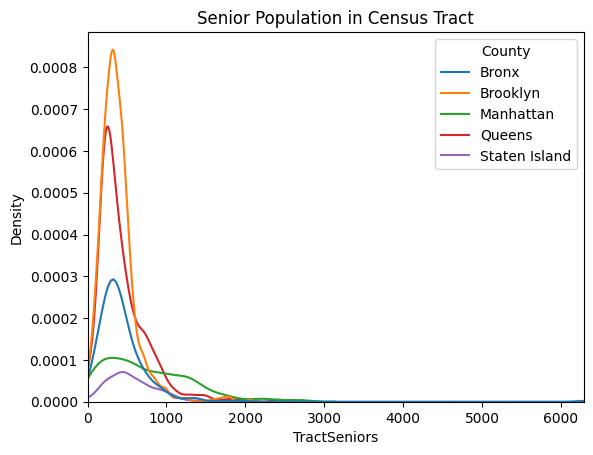

TractWhite 13418.0 512.5 2312.0 11309.5


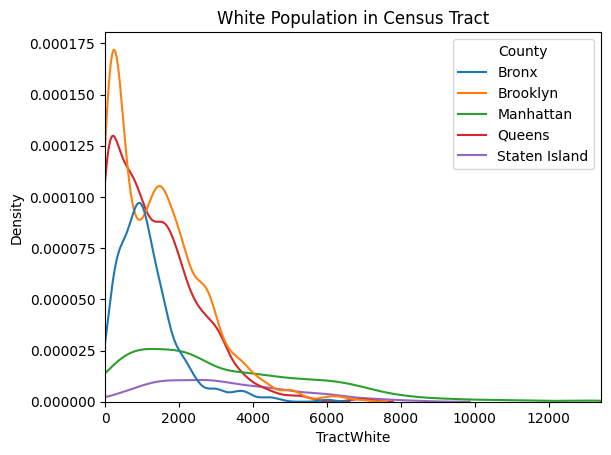

TractBlack 16804.0 74.0 1559.0 8984.0


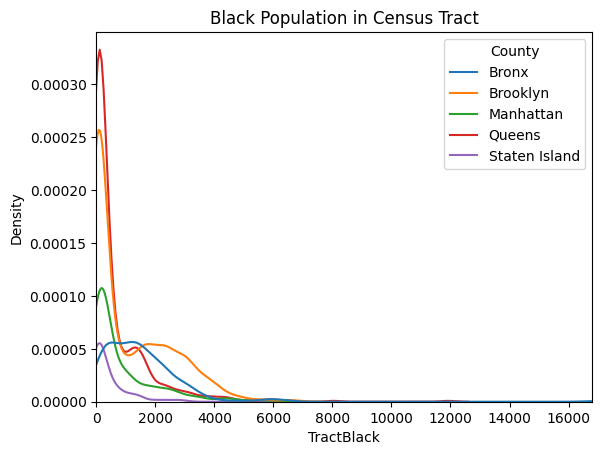

TractAsian 9069.0 61.0 627.25 3458.5


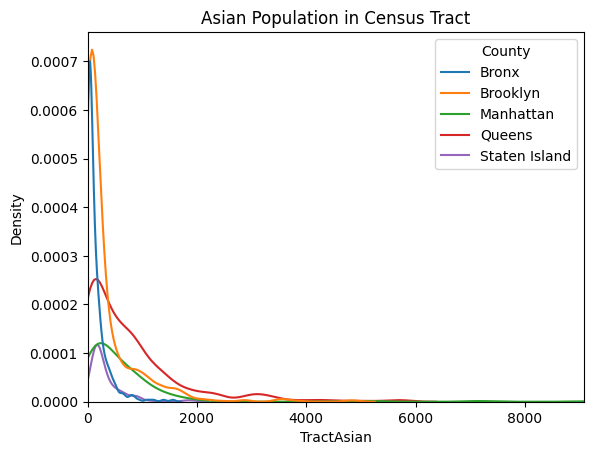

TractHispanic 12202.0 279.0 1354.5 6732.0


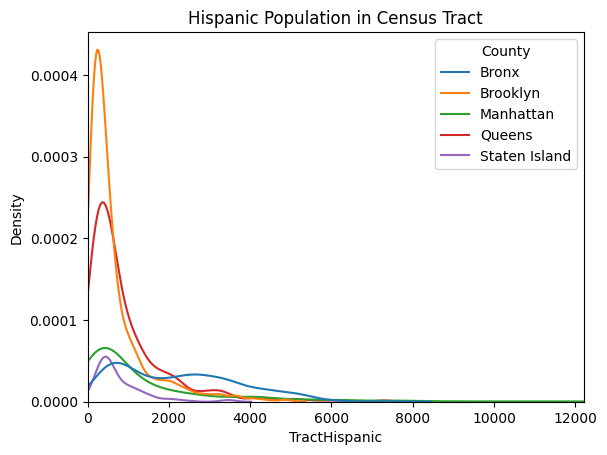

TractHUNV 6059.0 228.0 1098.0 5448.0


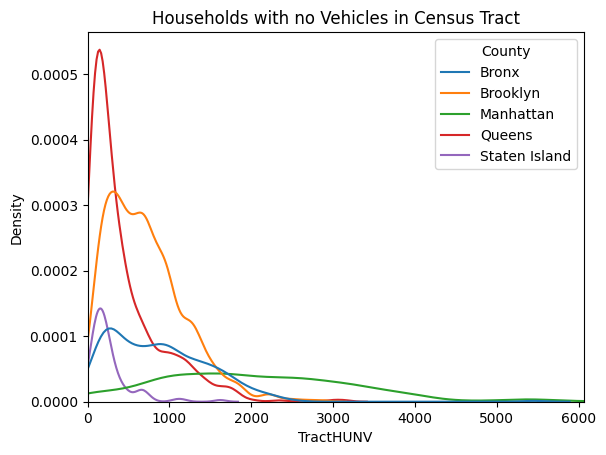

TractSNAP 2175.0 72.75 392.0 1988.25


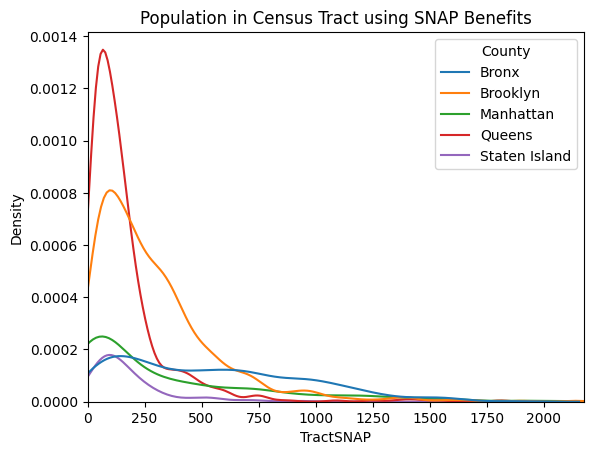

In [ ]:
tract_graphs = ['County',
               'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractHispanic', 'TractHUNV', 'TractSNAP']
graph_titles = ['Low Income Population in Census Tract',
                'Child Population in Census Tract',
                'Senior Population in Census Tract',
                'White Population in Census Tract',
                'Black Population in Census Tract',
                'Asian Population in Census Tract',
                'Hispanic Population in Census Tract',
                'Households with no Vehicles in Census Tract',
                'Population in Census Tract using SNAP Benefits']
title_count = 0
for tract in tract_graphs[1:]:
  max_num = new_york_counties[tract].max()
  top_quant = new_york_counties[tract].quantile(.75)
  bot_quant = new_york_counties[tract].quantile(.25)
  print(tract, max_num, bot_quant, top_quant, (top_quant-bot_quant)*5+top_quant)
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)
  g.set_xlim(0,max_num)
  plt.title(graph_titles[title_count])
  plt.show(g)
  title_count += 1

PovertyRate 100.0 8.3 25.1 109.1


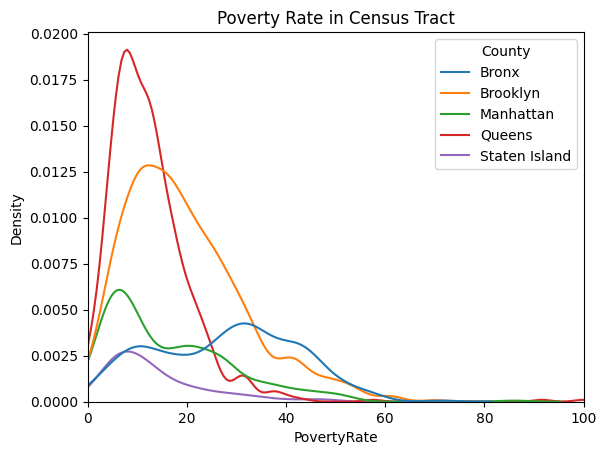

MedianFamilyIncome 250001.0 49414.0 95496.0 325906.0


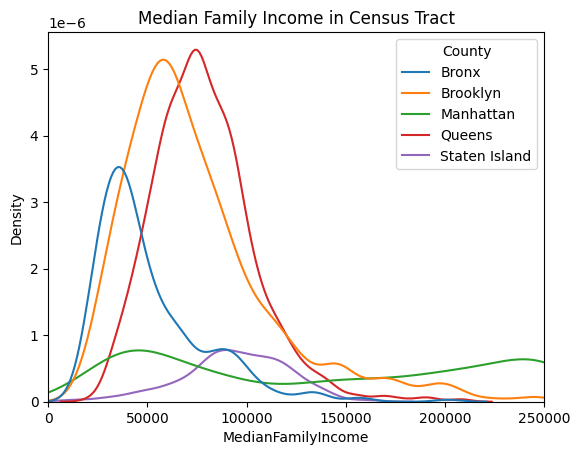

In [ ]:
tract_graphs = ['County',
               'PovertyRate', 'MedianFamilyIncome']
graph_titles = ['Poverty Rate in Census Tract',
                'Median Family Income in Census Tract']
title_count = 0
for tract in tract_graphs[1:]:
  max_num = new_york_counties[tract].max()
  top_quant = new_york_counties[tract].quantile(.75)
  bot_quant = new_york_counties[tract].quantile(.25)
  print(tract, max_num, bot_quant, top_quant, (top_quant-bot_quant)*5+top_quant)
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)
  g.set_xlim(0,max_num)
  plt.title(graph_titles[title_count])
  plt.show(g)
  title_count += 1

In [ ]:
counties = ['Queens', 'Bronx', 'Staten Island', 'Manhattan', 'Brooklyn']
food_df[food_df['County'].isin(['Queens County','Kings County', 'Bronx County', 'Richmond County', 'New York County'])]
for county in counties:
  print(county, new_york_counties[new_york_counties['County'].isin([county])].shape)

Queens (656, 156)
Bronx (336, 156)
Staten Island (108, 156)
Manhattan (286, 156)
Brooklyn (754, 156)


lapophalf 11091.0 7.0 1533.5 9166.0


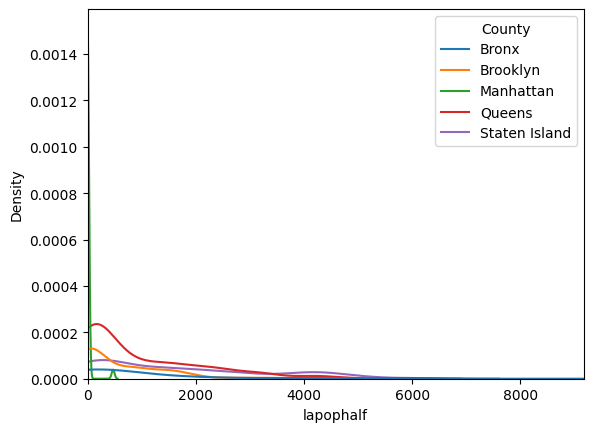

lapophalfshare 100.0 0.55 53.0775 315.71500000000003


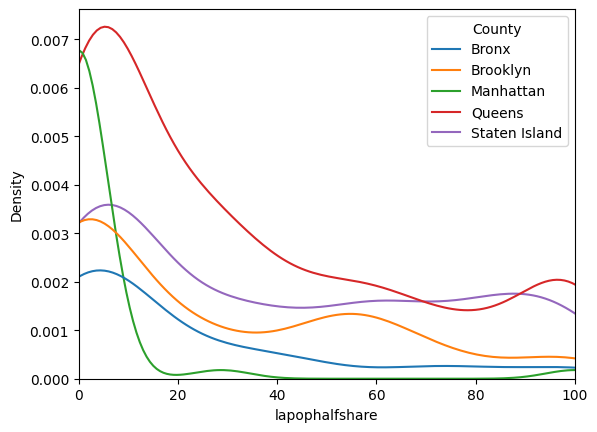

lalowihalf 2277.0 1.0 315.5 1888.0


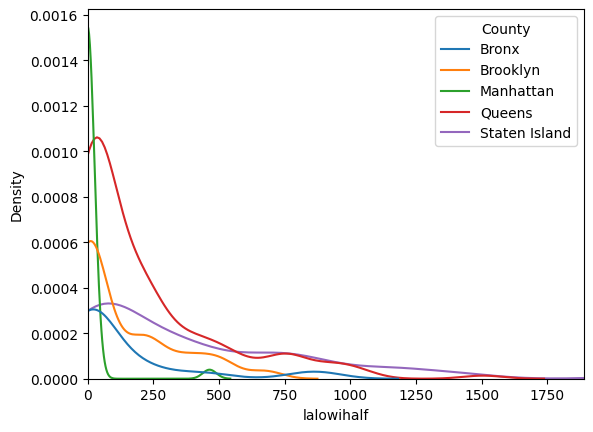

lalowihalfshare 87.09 0.0225 9.975 59.7375


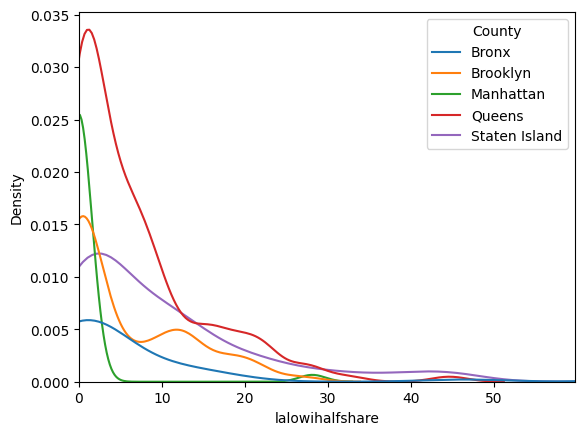

lahunvhalf 696.0 0.0 68.0 408.0


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


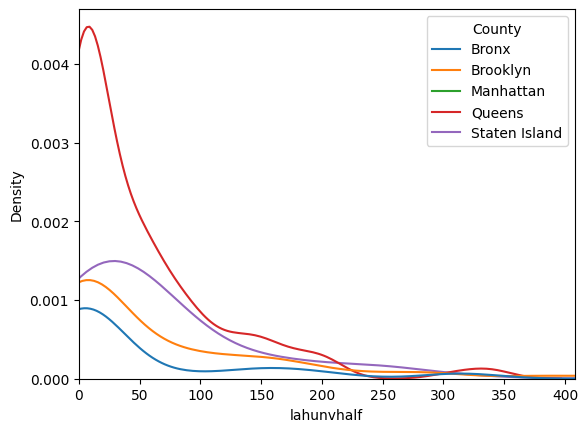

lahunvhalfshare 83.73 0.0 6.96 41.76


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


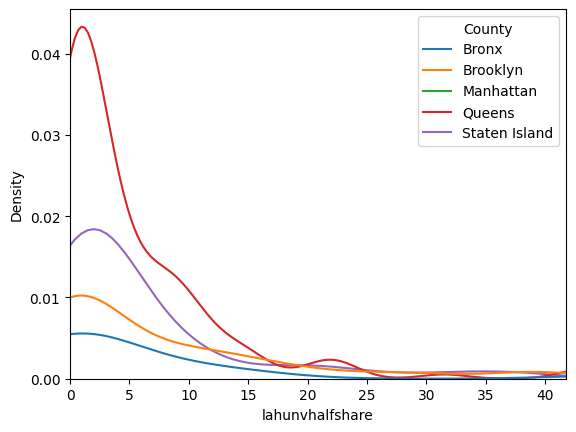

lasnaphalf 523.0 0.0 38.75 232.5


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


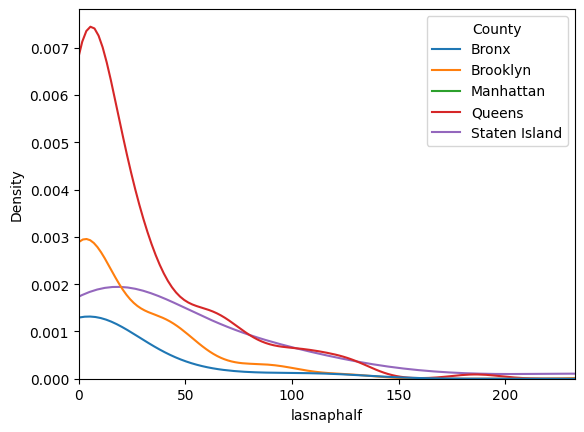

lasnaphalfshare 79.02 0.0 3.22 19.32


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


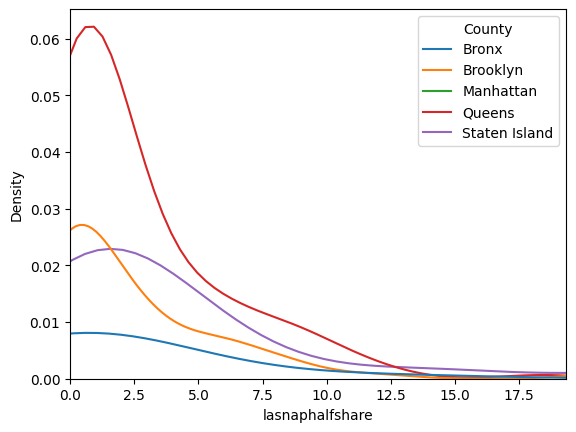

lapop1 7657.0 0.0 123.75 742.5


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


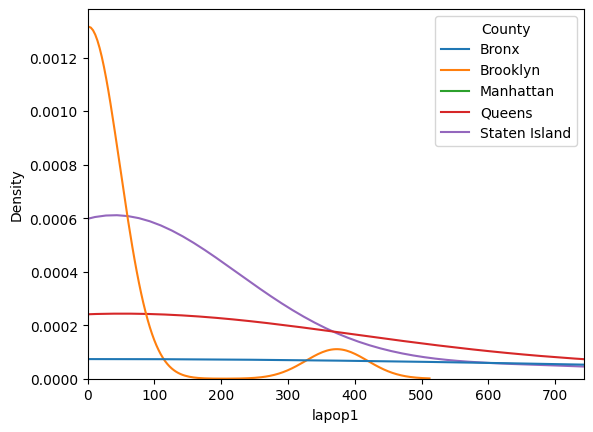

lapop1share 100.0 0.0 5.2875 31.725


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


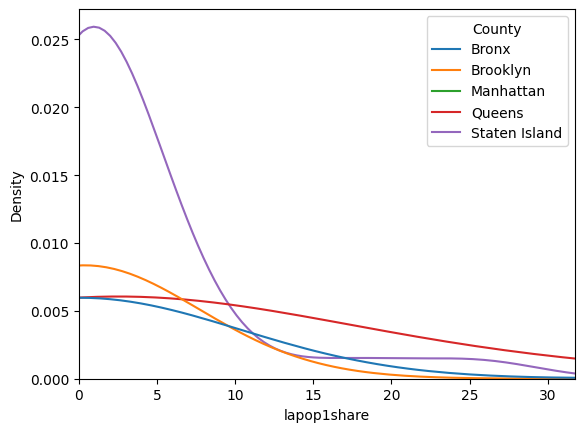

lalowi1 528.0 0.0 19.0 114.0


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


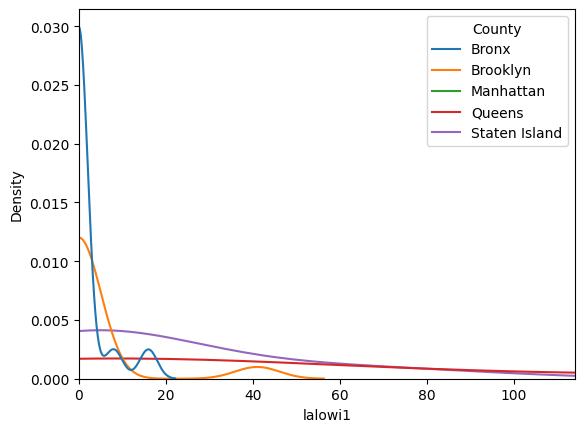

lalowi1share 40.12 0.0 0.62 3.72


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


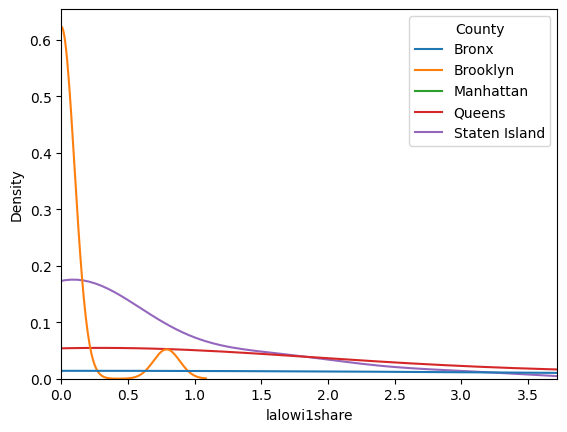

lahunv1 188.0 0.0 3.75 22.5


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


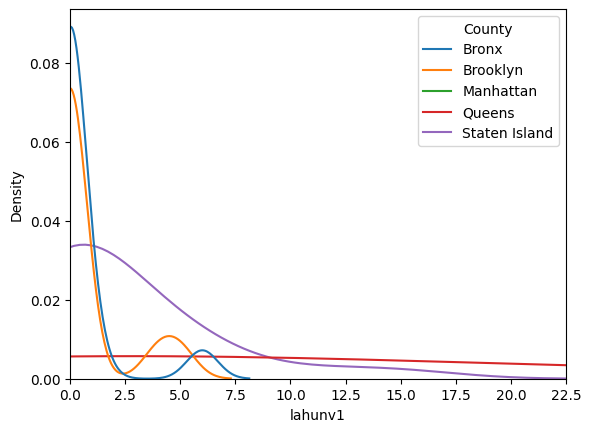

lahunv1share 42.86 0.0 0.13 0.78


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


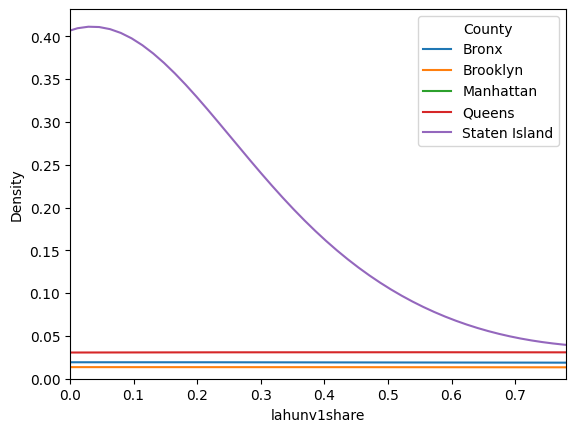

lasnap1 70.0 0.0 2.0 12.0


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


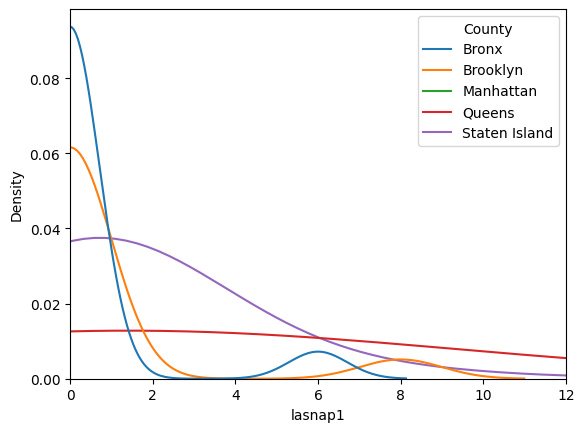

lasnap1share 57.14 0.0 0.15 0.9


<ipython-input-37-e40130cda095>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)


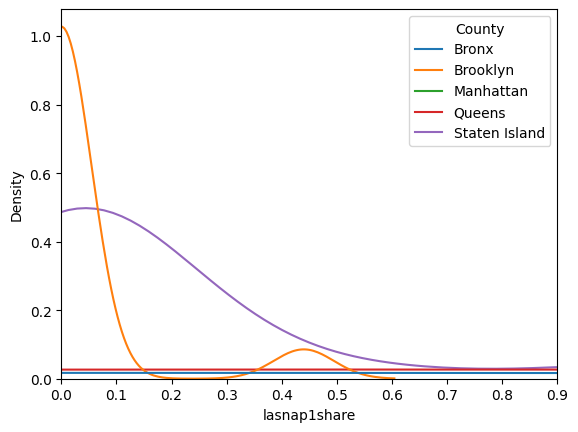

In [ ]:
look_cols=['State','County',
           'lapophalf', 'lapophalfshare', #Population and share of population in tract for low access (1/2 mile)
           'lalowihalf', 'lalowihalfshare', #Population and share of population in tract for low access AND low income
           'lahunvhalf', 'lahunvhalfshare',  #Population and share of population in tract for low access AND no vehicle for the household
           'lasnaphalf', 'lasnaphalfshare',  #Population and share of population in tract for snap access
           'lapop1', 'lapop1share', #Population and share of population in tract for low access (1/2 mile)
           'lalowi1', 'lalowi1share', #Population and share of population in tract for low access AND low income
           'lahunv1', 'lahunv1share',  #Population and share of population in tract for low access AND no vehicle for the household
           'lasnap1', 'lasnap1share',  #Population and share of population in tract for snap access
          ]
# for col in look_cols:
#   new_york_counties[col] = new_york_counties[col].fillna(0)

for tract in look_cols[2:]:
  max_num = new_york_counties[tract].max()
  top_quant = new_york_counties[tract].quantile(.75)
  bot_quant = new_york_counties[tract].quantile(.25)
  print(tract, max_num, bot_quant, top_quant, (top_quant-bot_quant)*5+top_quant)
  g = sns.kdeplot(data=new_york_counties, x=tract, hue='County', bw_adjust=.75)
  g.set_xlim(0,min(max_num, (top_quant-bot_quant)*5+top_quant))
  plt.show(g)

In [ ]:
for col in new_york_counties.columns:
  print("'"+col+"', ", end="")

'CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'lasen

In [ ]:
flag_cols = ['LowIncomeTracts', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'LATractsVehicle_20']
look_cols=['State','County',
           'lapophalf', 'lapophalfshare', #Population and share of population in tract for low access (1/2 mile)
           'lalowihalf', 'lalowihalfshare', #Population and share of population in tract for low access AND low income
           'lahunvhalf', 'lahunvhalfshare',  #Population and share of population in tract for low access AND no vehicle for the household
           'lasnaphalf', 'lasnaphalfshare',  #Population and share of population in tract for snap access
          ]
test = new_york_counties[look_cols]
flagged_rows = new_york_counties[new_york_counties[flag_cols].any(axis='columns')]
print(flagged_rows.shape)
no_na = test.dropna()
no_na
# filled_zeros = new_york_counties[look_cols]
# for col in look_cols:
#   filled_zeros[col] = filled_zeros[col].fillna(0)

# for tract in look_cols[2:]:
#   max_num = filled_zeros[tract].max()
#   print(tract, max_num)
#   g = sns.FacetGrid(filled_zeros, col='County')
#   g.map_dataframe(sns.kdeplot, tract)
#   plt.show()

(181, 156)


State         County  lapophalf  lapophalfshare  lalowihalf  \
42957  New York          Bronx    11091.0          100.00         0.0   
42958  New York          Bronx       64.0            1.49        16.0   
42959  New York          Bronx      264.0            4.79        44.0   
42961  New York          Bronx       41.0            2.14        24.0   
42964  New York          Bronx        1.0           13.47         0.0   
...         ...            ...        ...             ...         ...   
46774  New York  Staten Island       67.0            1.37        13.0   
46775  New York  Staten Island      575.0            9.04       119.0   
46776  New York  Staten Island     1086.0           33.26       724.0   
46777  New York  Staten Island     4702.0           96.99      2079.0   
46778  New York  Staten Island     1249.0           99.94       330.0   

       lalowihalfshare  lahunvhalf  lahunvhalfshare  lasnaphalf  \
42957             0.00         0.0             0.00         0.0   
42958             0.37         0.0             0.00         5.0   
42959             0.79        10.0             0.57        13.0   
42961             1.24         9.0             1.67         4.0   
42964             0.00         0.0            13.47         0.0   
...                ...         ...              ...         ...   
46774             0.27         2.0             0.10         1.0   
46775             1.87         8.0             0.41        23.0   
46776            22.16       245.0            23.09       239.0   
46777            42.89       608.0            38.45       495.0   
46778            26.43        72.0            16.13        59.0   

       lasnaphalfshare  
42957             0.00  
42958             0.34  
42959             0.71  
42961             0.82  
42964             1.57  
...                ...  
46774             0.06  
46775             1.17  
46776            22.55  
46777            31.34  
46778            13.18  

[382 rows x 10 columns]

In [ ]:
weird_data = new_york_counties[new_york_counties['LowIncomeTracts']==1]
# weird_data = weird_data[weird_data['lahunvhalf']==0]
weird_data['MedianFamilyIncome'].min()

12059.0

In [ ]:
health_survey_df = pd.read_sas('chs2020_public.sas7bdat')
for col in health_survey_df.columns:
  print(col)

cid
strata
survey
wt21_dual
wt21_dual_q1
strata_q1
qxvers
mood1
mood2
mood3
mood4
mood5
mood6
mood9
mood8
mood11
nutrition1
newrace
newrace6
agegroup
agegroup5
agegroup6
age21up
age25up
age40new
age45up
age50up
age18_64
birthsex
imputed_neighpovgroup4_1519
imputed_povertygroup
imputed_povgroup3
imputed_pov200
generalhealth
insuredgateway20
insured
insure5
pcp20
medplace
didntgetcare20
regularrx
skiprxcost
toldhighbp20
toldprescription20
takingmeds20
checkedbp20_q1
diabetes20
ageatdiabetes
diabcntrlmeds
toohighblsugar
everasthma
currentasthma20
stillasthmaall
firsttoldasthma
k6
nspd
mhtreat20_all
delaypayrent
workingac_q1
rodentsstreet
helpneighbors20_q1
discussissues
helpcommproj
didntcleandog
trustkeys
proudneigh
smoker
everyday
numberperdaya
cpd20a
heavysmoker20a
everydaycpda
smokecat
mentholcigs20
sourcelastcig
cost20cigarettes
cigpurchase20
cigarillo20_q1
smokeecig12m20_q1
smokeecig30days20_q1
likedecigsflavs_q1
smokehookah12m_q1
smellcigsmoke20_q1
newrace6_b
usborn
maritalstatus20

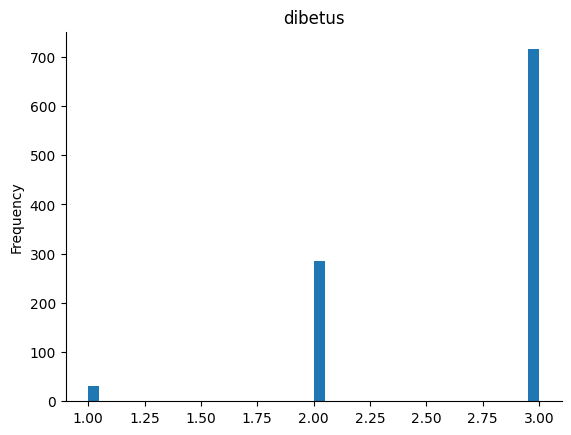

In [ ]:
health_survey_df['ageatdiabetes'].plot(kind='hist', bins=40, title='dibetus')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
three_counties = food_df[food_df['County'].isin(['Queens County','Kings County', 'Bronx County'])]

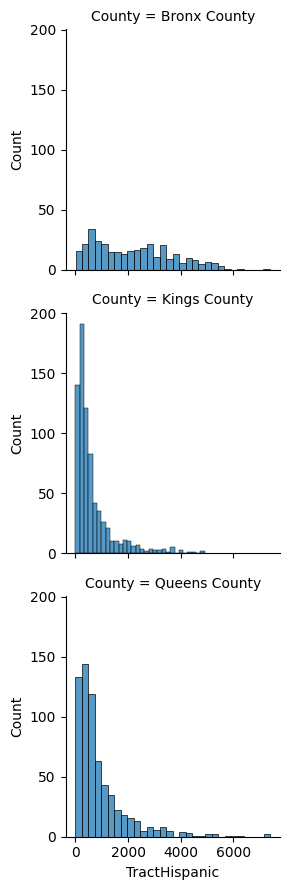

In [ ]:
g=sns.FacetGrid(three_counties, row="County")
g.map_dataframe(sns.histplot, 'TractHispanic', bins=30)

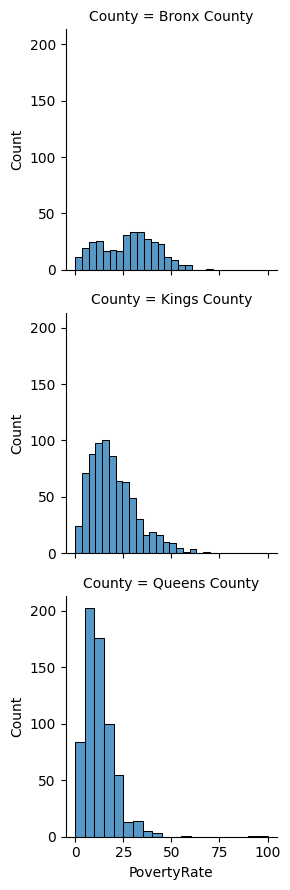

In [ ]:
g=sns.FacetGrid(three_counties, row="County")
g.map_dataframe(sns.histplot, 'PovertyRate', bins=20)

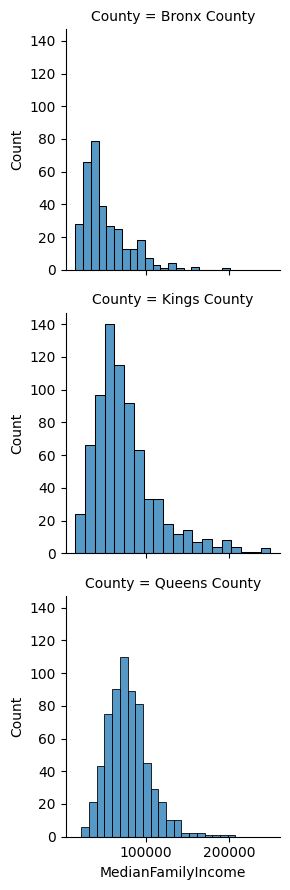

In [ ]:
g=sns.FacetGrid(three_counties, row="County")
g.map_dataframe(sns.histplot, 'MedianFamilyIncome', bins=20)

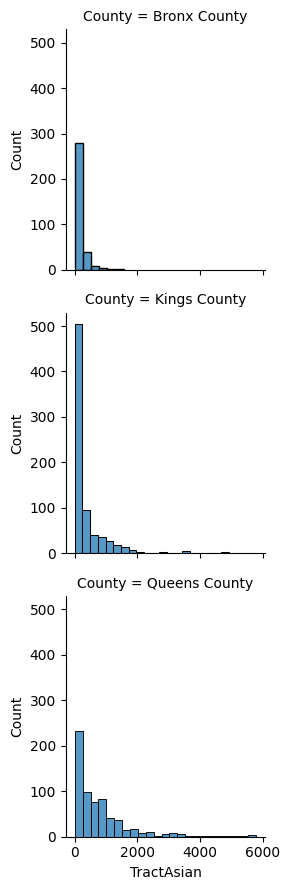

In [ ]:
g=sns.FacetGrid(three_counties, row="County")
g.map_dataframe(sns.histplot, 'TractAsian', binwidth=250)

In [ ]:
bronx= food_df[food_df['County'] == 'Bronx County']

bronx[selected_cols].describe()
queens_df[selected_cols].describe()

TractLOWI    TractKids  TractSeniors   TractWhite    TractBlack  \
count   656.000000   656.000000    656.000000   656.000000    656.000000   
mean   1126.785061   704.117378    436.198171  1350.690549    650.431402   
std     956.031635   431.551403    319.914975  1155.931840   1112.725831   
min       0.000000     0.000000      0.000000     0.000000      0.000000   
25%     492.250000   416.500000    230.000000   417.750000     52.500000   
50%     887.500000   613.500000    338.000000  1121.500000    176.500000   
75%    1408.750000   887.250000    560.250000  2002.250000    773.250000   
max    6912.000000  2807.000000   2459.000000  7075.000000  11907.000000   

        TractAsian  TractHispanic    TractHUNV    TractSNAP  PovertyRate  \
count   656.000000     656.000000   656.000000   656.000000   656.000000   
mean    780.163110     935.594512   437.217988   157.928354    12.464024   
std     939.759032    1044.231604   453.587259   191.500677     8.781774   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%     131.500000     298.750000   125.750000    51.000000     6.900000   
50%     490.500000     579.000000   265.000000   106.500000    10.900000   
75%    1033.250000    1162.250000   597.500000   183.250000    16.000000   
max    5791.000000    7401.000000  3133.000000  1812.000000   100.000000   

       MedianFamilyIncome  
count          640.000000  
mean         78522.648438  
std          25493.442009  
min          22086.000000  
25%          61257.750000  
50%          75844.000000  
75%          92197.250000  
max         207813.000000